# Section 1: Creating and cleaning dataset

In [ ]:
!pip install yfinance

     |████████████████████████████████| 5.5MB 29.9MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23442 sha256=801063e993525fd9ce71748cd4cdabf5306f1d2c00f2fead5cc5352839cd33ae
  Stored in directory: /root/.cache/pip/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import yfinance as yf

msft = yf.Ticker("^NSEI")

# get historical market data
hist = msft.history(period="7d")
print(hist)

                    Open          High  ...  Dividends  Stock Splits
Date                                    ...                         
2021-03-31  14811.849609  14813.750000  ...          0             0
2021-04-01  14798.400391  14883.200195  ...          0             0
2021-04-05  14837.700195  14849.849609  ...          0             0
2021-04-06  14737.000000  14779.099609  ...          0             0
2021-04-07  14716.450195  14879.799805  ...          0             0
2021-04-08  14875.650391  14984.150391  ...          0             0
2021-04-09  14882.650391  14918.450195  ...          0             0

[7 rows x 7 columns]


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [ ]:
import pandas as pd

In [ ]:
path = '/content/gdrive/MyDrive/COMP4641/Project/RawData/'

In [ ]:
df = pd.read_csv(path+"List of Indices.csv")
df

Unnamed: 0  Unnamed: 0.1  ...  CovidData FinancialCrisisData
0            0             0  ...       True                True
1            1             1  ...       True                True
2            2             2  ...       True                True
3            3             3  ...       True                True
4            4             4  ...       True                True
5            5             5  ...       True                True
6            6             6  ...       True                True
7            7             7  ...       True                True
8            8             8  ...       True                True
9            9             9  ...       True                True
10          10            10  ...       True                True
11          11            11  ...       True                True
12          12            12  ...       True               False
13          13            13  ...       True                True
14          14            14  ...       True                True
15          15            15  ...       True                True
16          16            16  ...       True                True
17          17            17  ...       True                True
18          18            18  ...       True                True
19          19            19  ...       True                True
20          20            20  ...       True               False
21          21            21  ...       True                True
22          22            22  ...       True                True
23          23            23  ...       True                True
24          24            24  ...       True                True
25          25            25  ...       True                True
26          26            26  ...       True                True
27          27            27  ...       True                True
28          28            28  ...      False               False
29          29            29  ...       True                True

[30 rows x 10 columns]

In [ ]:
#PreCovid  10/03/2019- 10/03/2020
#Covid 11/03/2020-11/03/2021
#Financial Crisis 1/11/2008 - 1/11/2009

def PeriodDataCollector(df,name_period,start,end):
    print("Starting Data Collection for",name_period)
    for i in range(len(df)):
        if not df.loc[i][name_period+"Data"]:
            if df.loc[i]["YFIN"]:
                current = yf.Ticker(df.loc[i]["Ticker Symbol"])
                hist = current.history(start=start,end=end)
                if len(hist)<5:
                    continue
                file_path = '/content/gdrive/MyDrive/COMP4641/Project/RawData/'+name_period+"/"
                hist.to_csv(file_path+df.loc[i]["Country"]+".csv")
                df.loc[i,name_period+"Data"]=True
    print("Data Collection for",name_period,"completed")
PeriodDataCollector(df,"PreCovid", "2019-3-10", "2020-3-10")
PeriodDataCollector(df,"Covid", "2020-3-11", "2021-3-11")
PeriodDataCollector(df,"FinancialCrisis", "2008-11-1", "2009-11-1")

Starting Data Collection for PreCovid
Data Collection for PreCovid completed
Starting Data Collection for Covid
Data Collection for Covid completed
Starting Data Collection for FinancialCrisis
- IMOEX.ME: Data doesn't exist for startDate = 1225497600, endDate = 1257033600
- ^OMXTGI: Data doesn't exist for startDate = 1225497600, endDate = 1257033600
Data Collection for FinancialCrisis completed


In [ ]:
df

Unnamed: 0  Unnamed: 0.1  ...  CovidData FinancialCrisisData
0            0             0  ...       True                True
1            1             1  ...       True                True
2            2             2  ...       True                True
3            3             3  ...       True                True
4            4             4  ...       True                True
5            5             5  ...       True                True
6            6             6  ...       True                True
7            7             7  ...       True                True
8            8             8  ...       True                True
9            9             9  ...       True                True
10          10            10  ...       True                True
11          11            11  ...       True                True
12          12            12  ...       True               False
13          13            13  ...       True                True
14          14            14  ...       True                True
15          15            15  ...       True                True
16          16            16  ...       True                True
17          17            17  ...       True                True
18          18            18  ...       True                True
19          19            19  ...       True                True
20          20            20  ...       True               False
21          21            21  ...       True                True
22          22            22  ...       True                True
23          23            23  ...       True                True
24          24            24  ...       True                True
25          25            25  ...       True                True
26          26            26  ...       True                True
27          27            27  ...       True                True
28          28            28  ...      False               False
29          29            29  ...       True                True

[30 rows x 10 columns]

In [ ]:
df.to_csv(path+"List of Indices.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [ ]:
import pandas as pd
test_excel = pd.read_excel('/content/gdrive/MyDrive/COMP4641/Project/RawData/Bloomberg data/ADX(covid).xlsx')


In [ ]:
test_excel

Start Date      2019-03-10 00:00:00
0               End Date      2021-03-11 00:00:00
1                    NaN                      NaN
2                    NaN              ADSMI Index
3                    NaN  #N/A Requesting Data...
4                  Dates                  PX_LAST
..                   ...                      ...
501  2021-03-07 00:00:00                  5691.46
502  2021-03-08 00:00:00                  5685.09
503  2021-03-09 00:00:00                  5583.12
504  2021-03-10 00:00:00                  5606.82
505  2021-03-11 00:00:00                  5636.83

[506 rows x 2 columns]

In [ ]:
df = test_excel[6:]
df

Start Date 2019-03-10 00:00:00
6    2019-03-11 00:00:00              4870.4
7    2019-03-12 00:00:00             4861.68
8    2019-03-13 00:00:00             4819.83
9    2019-03-14 00:00:00             4997.56
10   2019-03-17 00:00:00             4977.29
..                   ...                 ...
501  2021-03-07 00:00:00             5691.46
502  2021-03-08 00:00:00             5685.09
503  2021-03-09 00:00:00             5583.12
504  2021-03-10 00:00:00             5606.82
505  2021-03-11 00:00:00             5636.83

[500 rows x 2 columns]

In [ ]:
import datetime
#for i in range(len(dates)):
for i in df["Start Date"]:
    date = i.date()
    if date < datetime.date(2020,1,1): 
        print(date)

df = df.reset_index()

2019-03-11
2019-03-12
2019-03-13
2019-03-14
2019-03-17
2019-03-18
2019-03-19
2019-03-20
2019-03-21
2019-03-24
2019-03-25
2019-03-26
2019-03-27
2019-03-28
2019-03-31
2019-04-01
2019-04-02
2019-04-03
2019-04-04
2019-04-07
2019-04-08
2019-04-09
2019-04-10
2019-04-11
2019-04-15
2019-04-16
2019-04-17
2019-04-18
2019-04-21
2019-04-22
2019-04-23
2019-04-24
2019-04-25
2019-04-28
2019-04-29
2019-04-30
2019-05-01
2019-05-02
2019-05-05
2019-05-06
2019-05-07
2019-05-08
2019-05-09
2019-05-12
2019-05-13
2019-05-14
2019-05-15
2019-05-16
2019-05-19
2019-05-20
2019-05-21
2019-05-22
2019-05-23
2019-05-26
2019-05-27
2019-05-28
2019-05-29
2019-05-30
2019-06-09
2019-06-10
2019-06-11
2019-06-12
2019-06-13
2019-06-16
2019-06-17
2019-06-18
2019-06-19
2019-06-20
2019-06-23
2019-06-24
2019-06-25
2019-06-26
2019-06-27
2019-06-30
2019-07-01
2019-07-02
2019-07-03
2019-07-04
2019-07-07
2019-07-08
2019-07-09
2019-07-10
2019-07-11
2019-07-14
2019-07-15
2019-07-16
2019-07-17
2019-07-18
2019-07-21
2019-07-22
2019-07-23

In [ ]:
df

index           Start Date 2019-03-10 00:00:00
0        6  2019-03-11 00:00:00              4870.4
1        7  2019-03-12 00:00:00             4861.68
2        8  2019-03-13 00:00:00             4819.83
3        9  2019-03-14 00:00:00             4997.56
4       10  2019-03-17 00:00:00             4977.29
..     ...                  ...                 ...
495    501  2021-03-07 00:00:00             5691.46
496    502  2021-03-08 00:00:00             5685.09
497    503  2021-03-09 00:00:00             5583.12
498    504  2021-03-10 00:00:00             5606.82
499    505  2021-03-11 00:00:00             5636.83

[500 rows x 3 columns]

In [ ]:
bloomberg_raw_file_path = '/content/gdrive/MyDrive/COMP4641/Project/RawData/Bloomberg data/'
def BloombergIndicesFormatter(df):
    for i in range(len(df)):
            if not df.loc[i]["YFIN"]:
                current = df.loc[i]["Ticker Symbol"]
                if current == "None":
                    continue
                current_covid = pd.read_excel(bloomberg_raw_file_path + current + '(covid).xlsx')
                current_covid_refined = current_covid[5:]
                precovid_dates = []
                precovid_price = []
                covid_dates = []
                covid_price = []
                preCovid  = True
                for j in current_covid_refined.itertuples():
                    date = j[1].date() 
                    if date<datetime.date(2020,3,11): #11/03/2020
                        precovid_dates.append(j[1])
                        precovid_price.append(j[2])
                    else:
                        covid_dates.append(j[1])
                        covid_price.append(j[2])
                
                precovid_list_of_tuples = list(zip(precovid_dates, precovid_price))
                precovid_df = pd.DataFrame(precovid_list_of_tuples,columns = ['Date', 'Close'])
                covid_list_of_tuples = list(zip(covid_dates, covid_price))
                covid_df = pd.DataFrame(covid_list_of_tuples,columns = ['Date', 'Close'])
                
                #print(precovid_df)
                #print(covid_df)
                

                file_path = '/content/gdrive/MyDrive/COMP4641/Project/RawData/'
                country = df.loc[i]["Country"]

                if not df.loc[i,"PreCovidData"]:
                    precovid_df.to_csv(file_path+"PreCovid/"+country+".csv")
                    df.loc[i,"PreCovidData"]=True

                if not df.loc[i,"CovidData"]:
                    covid_df.to_csv(file_path+"Covid/"+country+".csv")
                    df.loc[i,"CovidData"]=True

                current_financial = pd.read_excel(bloomberg_raw_file_path + current + '(financial).xlsx')
                current_financial_refined = current_financial[5:]
                financial_dates=[]
                financial_price=[]
                for j in current_financial_refined.itertuples():
                    financial_dates.append(j[1])
                    financial_price.append(j[2])
                financial_list_of_tuples = list(zip(financial_dates, financial_price))
                financial_df = pd.DataFrame(financial_list_of_tuples,columns = ['Date', 'Close'])

                if not df.loc[i,"FinancialCrisisData"]:
                    financial_df.to_csv(file_path+"FinancialCrisis/"+country+".csv")
                    df.loc[i,"FinancialCrisisData"]=True


BloombergIndicesFormatter(df)

In [ ]:
df.to_csv(path+"List of Indices.csv")

In [ ]:
# NOTE: I dont know why morrocco file is repeating date 12/3/19 had to manually fix that

In [ ]:
combined_data_path = '/content/gdrive/MyDrive/COMP4641/Project/Combined Period Data/'
import math
def CombinedPeriod(df,name_period,start,end):
    country_df_list = []
    for i in range(len(df)):
        if df.loc[i,name_period+"Data"]:
            country_df = pd.read_csv(path+name_period+'/'+df.loc[i]["Country"]+".csv")
            dates_unformatted = country_df['Date']
            dates=[]
            #print(df.loc[i]["Country"])
            for date_unformatted in dates_unformatted:
                #print(date_unformatted)
                year = int(date_unformatted[:4])
                month = int(date_unformatted[5:7])
                day = int(date_unformatted[8:])
                date_formatted = datetime.date(year,month,day)
                dates.append(date_formatted)
            close = country_df['Close']
            list_of_tuples = list(zip(dates, close))
            rendered = pd.DataFrame(list_of_tuples,columns = ['Date', df.loc[i]["Country"]])
            country_df_list.append(rendered)
    
    dates = []
    d = start
    while d <= end:
       dates.append(d)
       d += datetime.timedelta(days=1)
    
    list_of_tuples = list(zip(dates))
    period_df = pd.DataFrame(list_of_tuples,columns = ['Date'])
    period_df.set_index('Date',inplace=True)
    print(period_df)
    print(len(period_df))

    for country_df in country_df_list:
        print(country_df)
        country_df.set_index("Date",inplace=True)
        #period_df = period_df.join(country_df,how="left")
        period_df = period_df.merge(country_df,how="left",left_index=True,right_index=True)
    
    print(period_df)
    for country in period_df.columns:
        period_df[country].apply(lambda x: float(x))

    indices = list(period_df.index)
    for i in range(len(period_df)):
        #print(indices[i],end=" ")
        delete = True
        for country in period_df.columns:
            #print(country)
            current_value = period_df.loc[indices[i]][country].astype(float)
            #print(current_value)
            if not math.isnan(current_value):
                delete = False
                break
        if delete:
            period_df.drop(indices[i],inplace=True)
    print(period_df)

    indices = list(period_df.index)
    for country in period_df.columns:
        prev = None
        for i in range(len(period_df)):
            if not math.isnan(period_df.loc[indices[i]][country].astype(float)):
                prev = period_df.loc[indices[i]][country].astype(float)
                break
        for i in range(len(period_df)):
            if math.isnan(period_df.loc[indices[i]][country].astype(float)):
                period_df.loc[indices[i]][country] = prev
            else:
                prev = period_df.loc[indices[i]][country].astype(float)
                
        
    
    period_df.to_csv(combined_data_path+name_period+".csv")
          
    return period_df
           

precovid = CombinedPeriod(df,"PreCovid", datetime.date(2019,3,10),datetime.date(2020,3,10))
covid = CombinedPeriod(df,"Covid", datetime.date(2020,3,11), datetime.date(2021,3,11))
financial = CombinedPeriod(df,"FinancialCrisis", datetime.date(2008,11,1), datetime.date(2009,11,1))

In [ ]:
precovid

In [ ]:
covid

In [ ]:
financial

In [ ]:
x,y = datetime.date(2019,3,10),datetime.date(2020,3,10)

while x<y:
  print(x)
  x = x+datetime.timedelta(days=1)

# Section 2: Calculating Log returns

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
covid = pd.read_csv('/content/gdrive/MyDrive/COMP4641/Project/Combined Period Data/Covid.csv')
precovid =pd.read_csv('/content/gdrive/MyDrive/COMP4641/Project/Combined Period Data/PreCovid.csv')
financial = pd.read_csv('/content/gdrive/MyDrive/COMP4641/Project/Combined Period Data/FinancialCrisis.csv')

##calculating returns for covid df

In [ ]:
covid.columns[1:]

Index(['USA', 'France', 'Germany', 'Italy', 'Spain', 'UK', 'Australia ',
       'Hong Kong', 'Japan', 'Singapore', 'Brazil', 'Greece', 'Russia', 'UAE',
       'China', 'India', 'Indonesia', 'Korea', 'Malaysia', 'Taiwan', 'Estonia',
       'Kazakhstan', 'Slovenia', 'Kenya', 'Morocco', 'Nigeria', 'Bahrain',
       'Oman', 'Vietnam'],
      dtype='object')

In [ ]:
# creating new df with log return values
covid_log = pd.DataFrame(columns=covid.columns[:])
for column in covid.iloc[:, 1:]:
   covid_log[column]= covid[column].rolling(2).apply(lambda x: (np.log(x.to_numpy()[1]/x.to_numpy()[0])))

In [ ]:
covid.shape[0]

311

In [ ]:
# adding dates to log df in case its needed
for i,item in covid[covid.columns[0]].iteritems(): 
  if(i+1<covid.shape[0]):
    print(covid[covid.columns[0]][i]+'-'+ covid[covid.columns[0]][i+1] )
    covid_log[covid.columns[0]][i+1]= covid[covid.columns[0]][i]+'-'+ covid[covid.columns[0]][i+1] 

2020-03-11-2020-03-12
2020-03-12-2020-03-13
2020-03-13-2020-03-15
2020-03-15-2020-03-16
2020-03-16-2020-03-17
2020-03-17-2020-03-18
2020-03-18-2020-03-19
2020-03-19-2020-03-20
2020-03-20-2020-03-22
2020-03-22-2020-03-23
2020-03-23-2020-03-24
2020-03-24-2020-03-25
2020-03-25-2020-03-26
2020-03-26-2020-03-27
2020-03-27-2020-03-29
2020-03-29-2020-03-30
2020-03-30-2020-03-31
2020-03-31-2020-04-01
2020-04-01-2020-04-02
2020-04-02-2020-04-03
2020-04-03-2020-04-05
2020-04-05-2020-04-06
2020-04-06-2020-04-07
2020-04-07-2020-04-08
2020-04-08-2020-04-09
2020-04-09-2020-04-10
2020-04-10-2020-04-12
2020-04-12-2020-04-13
2020-04-13-2020-04-14
2020-04-14-2020-04-15
2020-04-15-2020-04-16
2020-04-16-2020-04-17
2020-04-17-2020-04-19
2020-04-19-2020-04-20
2020-04-20-2020-04-21
2020-04-21-2020-04-22
2020-04-22-2020-04-23
2020-04-23-2020-04-24
2020-04-24-2020-04-26
2020-04-26-2020-04-27
2020-04-27-2020-04-28
2020-04-28-2020-04-29
2020-04-29-2020-04-30
2020-04-30-2020-05-01
2020-05-01-2020-05-03
2020-05-03

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
covid_log.head()

Date       USA    France  ...   Bahrain      Oman   Vietnam
0                    NaN       NaN       NaN  ...       NaN       NaN       NaN
1  2020-03-11-2020-03-12 -0.099945 -0.130983  ... -0.036167 -0.025992 -0.053284
2  2020-03-12-2020-03-13  0.088808  0.018156  ...  0.000000  0.000000 -0.009758
3  2020-03-13-2020-03-15  0.000000  0.000000  ... -0.015286  0.003911  0.000000
4  2020-03-15-2020-03-16 -0.127652 -0.059244  ... -0.013723 -0.017963 -0.018442

[5 rows x 30 columns]

In [ ]:
#removing first row on NaN
covid_log.drop(0,axis=0,inplace=True)
covid_log.head()

Date       USA    France  ...   Bahrain      Oman   Vietnam
1  2020-03-11-2020-03-12 -0.099945 -0.130983  ... -0.036167 -0.025992 -0.053284
2  2020-03-12-2020-03-13  0.088808  0.018156  ...  0.000000  0.000000 -0.009758
3  2020-03-13-2020-03-15  0.000000  0.000000  ... -0.015286  0.003911  0.000000
4  2020-03-15-2020-03-16 -0.127652 -0.059244  ... -0.013723 -0.017963 -0.018442
5  2020-03-16-2020-03-17  0.058226  0.028026  ... -0.011388 -0.005800 -0.002785

[5 rows x 30 columns]

In [ ]:
#store to csv
covid_log.to_csv('/content/gdrive/MyDrive/COMP4641/Project/Combined Period Data/covid_log.csv')

##calculating returns for pre covid df





In [ ]:
precovid.columns[:]

Index(['Date', 'USA', 'France', 'Germany', 'Italy', 'Spain', 'UK',
       'Australia ', 'Hong Kong', 'Japan', 'Singapore', 'Brazil', 'Greece',
       'Russia', 'UAE', 'China', 'India', 'Indonesia', 'Korea', 'Malaysia',
       'Taiwan', 'Estonia', 'Kazakhstan', 'Slovenia', 'Kenya', 'Morocco',
       'Nigeria', 'Bahrain', 'Oman', 'Vietnam'],
      dtype='object')

In [ ]:
# creating new df with log return values
precovid_log = pd.DataFrame(columns=precovid.columns[:])
for column in precovid.iloc[:, 1:]:
   precovid_log[column]= precovid[column].rolling(2).apply(lambda x: (np.log(x.to_numpy()[1]/x.to_numpy()[0])))

In [ ]:
# appeding dates to log df in case its needed
for i,item in precovid[covid.columns[0]].iteritems(): 
  if(i+1<precovid.shape[0]):
    print(precovid[precovid.columns[0]][i]+'-'+ precovid[precovid.columns[0]][i+1] )
    precovid_log[precovid.columns[0]][i+1]= precovid[precovid.columns[0]][i]+'-'+ precovid[precovid.columns[0]][i+1] 

2019-03-10-2019-03-11
2019-03-11-2019-03-12
2019-03-12-2019-03-13
2019-03-13-2019-03-14
2019-03-14-2019-03-15
2019-03-15-2019-03-17
2019-03-17-2019-03-18
2019-03-18-2019-03-19
2019-03-19-2019-03-20
2019-03-20-2019-03-21
2019-03-21-2019-03-22
2019-03-22-2019-03-24
2019-03-24-2019-03-25
2019-03-25-2019-03-26
2019-03-26-2019-03-27
2019-03-27-2019-03-28
2019-03-28-2019-03-29
2019-03-29-2019-03-31
2019-03-31-2019-04-01
2019-04-01-2019-04-02
2019-04-02-2019-04-03
2019-04-03-2019-04-04
2019-04-04-2019-04-05
2019-04-05-2019-04-07
2019-04-07-2019-04-08
2019-04-08-2019-04-09
2019-04-09-2019-04-10
2019-04-10-2019-04-11
2019-04-11-2019-04-12
2019-04-12-2019-04-14
2019-04-14-2019-04-15
2019-04-15-2019-04-16
2019-04-16-2019-04-17
2019-04-17-2019-04-18
2019-04-18-2019-04-19
2019-04-19-2019-04-21
2019-04-21-2019-04-22
2019-04-22-2019-04-23
2019-04-23-2019-04-24
2019-04-24-2019-04-25
2019-04-25-2019-04-26
2019-04-26-2019-04-28
2019-04-28-2019-04-29
2019-04-29-2019-04-30
2019-04-30-2019-05-01
2019-05-01

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
precovid_log.head()

Date       USA    France  ...   Bahrain      Oman   Vietnam
0                    NaN       NaN       NaN  ...       NaN       NaN       NaN
1  2019-03-10-2019-03-11  0.000000  0.000000  ...  0.000356 -0.001164  0.000000
2  2019-03-11-2019-03-12  0.002949  0.000814  ... -0.000953 -0.000676  0.016839
3  2019-03-12-2019-03-13  0.006926  0.006832  ...  0.004410 -0.002062  0.004076
4  2019-03-13-2019-03-14 -0.000868  0.008146  ... -0.001525  0.000174  0.003009

[5 rows x 30 columns]

In [ ]:
#removing first row on NaN values
precovid_log.drop(0,axis=0,inplace=True)
precovid_log.head()

Date       USA    France  ...   Bahrain      Oman   Vietnam
1  2019-03-10-2019-03-11  0.000000  0.000000  ...  0.000356 -0.001164  0.000000
2  2019-03-11-2019-03-12  0.002949  0.000814  ... -0.000953 -0.000676  0.016839
3  2019-03-12-2019-03-13  0.006926  0.006832  ...  0.004410 -0.002062  0.004076
4  2019-03-13-2019-03-14 -0.000868  0.008146  ... -0.001525  0.000174  0.003009
5  2019-03-14-2019-03-15  0.004973  0.010328  ...  0.000000  0.000000 -0.004293

[5 rows x 30 columns]

In [ ]:
#store to csv
precovid_log.to_csv('/content/gdrive/MyDrive/COMP4641/Project/Combined Period Data/precovid_log.csv')

##calculating returns for 2008 financial df





In [ ]:
financial.columns[:]

Index(['Date', 'USA', 'France', 'Germany', 'Italy', 'Spain', 'UK',
       'Australia ', 'Hong Kong', 'Japan', 'Singapore', 'Brazil', 'Greece',
       'UAE', 'China', 'India', 'Indonesia', 'Korea', 'Malaysia', 'Taiwan',
       'Kazakhstan', 'Slovenia', 'Kenya', 'Morocco', 'Nigeria', 'Bahrain',
       'Oman', 'Vietnam'],
      dtype='object')

In [ ]:
# creating new df with log return values
financial_log = pd.DataFrame(columns=financial.columns[:])
for column in financial.iloc[:, 1:]:
   financial_log[column]= financial[column].rolling(2).apply(lambda x: (np.log(x.to_numpy()[1]/x.to_numpy()[0])))

In [ ]:
# appeding dates to log df in case its needed
for i,item in financial[financial.columns[0]].iteritems(): 
  if(i+1<financial.shape[0]):
    print(financial[financial.columns[0]][i]+'-'+ financial[financial.columns[0]][i+1] )
    financial_log[financial.columns[0]][i+1]= financial[financial.columns[0]][i]+'-'+ financial[financial.columns[0]][i+1] 

2008-11-02-2008-11-03
2008-11-03-2008-11-04
2008-11-04-2008-11-05
2008-11-05-2008-11-06
2008-11-06-2008-11-07
2008-11-07-2008-11-09
2008-11-09-2008-11-10
2008-11-10-2008-11-11
2008-11-11-2008-11-12
2008-11-12-2008-11-13
2008-11-13-2008-11-14
2008-11-14-2008-11-16
2008-11-16-2008-11-17
2008-11-17-2008-11-18
2008-11-18-2008-11-19
2008-11-19-2008-11-20
2008-11-20-2008-11-21
2008-11-21-2008-11-23
2008-11-23-2008-11-24
2008-11-24-2008-11-25
2008-11-25-2008-11-26
2008-11-26-2008-11-27
2008-11-27-2008-11-28
2008-11-28-2008-11-30
2008-11-30-2008-12-01
2008-12-01-2008-12-02
2008-12-02-2008-12-03
2008-12-03-2008-12-04
2008-12-04-2008-12-05
2008-12-05-2008-12-07
2008-12-07-2008-12-08
2008-12-08-2008-12-09
2008-12-09-2008-12-10
2008-12-10-2008-12-11
2008-12-11-2008-12-12
2008-12-12-2008-12-14
2008-12-14-2008-12-15
2008-12-15-2008-12-16
2008-12-16-2008-12-17
2008-12-17-2008-12-18
2008-12-18-2008-12-19
2008-12-19-2008-12-21
2008-12-21-2008-12-22
2008-12-22-2008-12-23
2008-12-23-2008-12-24
2008-12-24

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
financial_log.head()

Date       USA    France  ...   Bahrain      Oman   Vietnam
0                    NaN       NaN       NaN  ...       NaN       NaN       NaN
1  2008-11-02-2008-11-03  0.000000  0.000000  ... -0.010621 -0.007397  0.000000
2  2008-11-03-2008-11-04  0.040014  0.045199  ...  0.002751  0.005555  0.000000
3  2008-11-04-2008-11-05 -0.054115 -0.019970  ...  0.006058  0.057201  0.044348
4  2008-11-05-2008-11-06 -0.051571 -0.065933  ... -0.003342 -0.016735  0.004437

[5 rows x 28 columns]

In [ ]:
#removing first row on NaN values
financial_log.drop(0,axis=0,inplace=True)
financial_log.head()

Date       USA    France  ...   Bahrain      Oman   Vietnam
1  2008-11-02-2008-11-03  0.000000  0.000000  ... -0.010621 -0.007397  0.000000
2  2008-11-03-2008-11-04  0.040014  0.045199  ...  0.002751  0.005555  0.000000
3  2008-11-04-2008-11-05 -0.054115 -0.019970  ...  0.006058  0.057201  0.044348
4  2008-11-05-2008-11-06 -0.051571 -0.065933  ... -0.003342 -0.016735  0.004437
5  2008-11-06-2008-11-07  0.028446  0.023883  ...  0.000000  0.000000 -0.036330

[5 rows x 28 columns]

In [ ]:
#store to csv
financial_log.to_csv('/content/gdrive/MyDrive/COMP4641/Project/Combined Period Data/financial_log.csv')

# Section3: Granger casaulity

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import grangercausalitytests
import pickle

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
covid = pd.read_csv('/content/gdrive/MyDrive/COMP4641/Project/Combined Period Data/covid_log.csv').iloc[:,2:]
precovid =pd.read_csv('/content/gdrive/MyDrive/COMP4641/Project/Combined Period Data/precovid_log.csv').iloc[:,2:]
financial = pd.read_csv('/content/gdrive/MyDrive/COMP4641/Project/Combined Period Data/financial_log.csv').iloc[:,2:]

In [ ]:
maxlag=3
test = 'ssr-chi2test'

def grangers_causality_matrix(X_train, variables, test = 'ssr_chi2test', verbose=False):

  dataset = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
  
  for c in dataset.columns:
    for r in dataset.index:
      test_result = grangercausalitytests(X_train[[r,c]], maxlag=maxlag, verbose=False)
      p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
    
      if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')

      min_p_value = np.min(p_values)
      dataset.loc[r,c] = min_p_value
  dataset.columns = [var for var in variables]
  dataset.index = [var for var in variables]

  return dataset

## Covid

In [ ]:
covid_p = grangers_causality_matrix(covid, variables = covid.columns).T
covid_p.head()

USA  France  Germany   Italy  ...  Nigeria  Bahrain    Oman  Vietnam
USA      1.0000  0.2910   0.6287  0.0551  ...   0.0120   0.0006  0.0567   0.0000
France   0.0039  1.0000   0.0519  0.0114  ...   0.3322   0.0654  0.0168   0.0018
Germany  0.0000  0.0560   1.0000  0.0490  ...   0.1675   0.1437  0.0109   0.0007
Italy    0.0000  0.0010   0.0732  1.0000  ...   0.4367   0.0243  0.0012   0.0040
Spain    0.0198  0.0307   0.0449  0.0574  ...   0.2374   0.0736  0.0017   0.0183

[5 rows x 29 columns]

In [ ]:
columns = covid_p.columns
covid_adjacency = pd.DataFrame()
for idx, names in enumerate(columns):
  covid_adjacency[names] = covid_p[names].apply(lambda x: 1e-8 if x == 0 else x)
  covid_adjacency[names] = covid_adjacency[names].apply(lambda x: -np.log(x))
  covid_adjacency[names] = covid_adjacency[names].apply(lambda x: 0 if x < -np.log(0.05) else x)
  covid_adjacency[names] = (covid_adjacency[names] - covid_adjacency[names].min()) /(covid_adjacency[names].max() - covid_adjacency[names].min())
  covid_adjacency [names] = covid_adjacency[names].fillna(0)  

covid_adjacency.head()

USA    France   Germany  ...   Bahrain      Oman   Vietnam
USA      0.000000  0.000000  0.000000  ...  1.000000  0.000000  1.000000
France   0.301117  0.000000  0.000000  ...  0.000000  0.221836  0.343091
Germany  1.000000  0.000000  0.000000  ...  0.000000  0.245322  0.394363
Italy    1.000000  0.375000  0.000000  ...  0.501077  0.365102  0.299743
Spain    0.212917  0.189108  0.168469  ...  0.000000  0.346194  0.217194

[5 rows x 29 columns]

### Overall Network

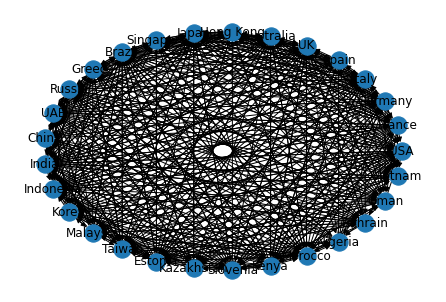

In [ ]:
stocks = covid_adjacency.index.values

# Create DiGraph from A
G = nx.from_numpy_matrix(np.array(covid_adjacency), create_using=nx.DiGraph())

#relabels the nodes to match the  stocks names
G = nx.relabel_nodes(G,lambda x: stocks[x])

# Use spring_layout to handle positioning of graph
layout = nx.circular_layout(G)

# Draw the graph using the layout - with_labels=True if you want node labels.
nx.draw(G, layout, with_labels=True)

# Show plot
plt.show()

# nx.write_gpickle(G,'/content/gdrive/MyDrive/COMP4641/Project/Combined Period Data/OverallCovid_nolabel.gpickle')
nx.write_gpickle(G,'/content/gdrive/MyDrive/COMP4641/Project/Combined Period Data/OverallCovid.gpickle')

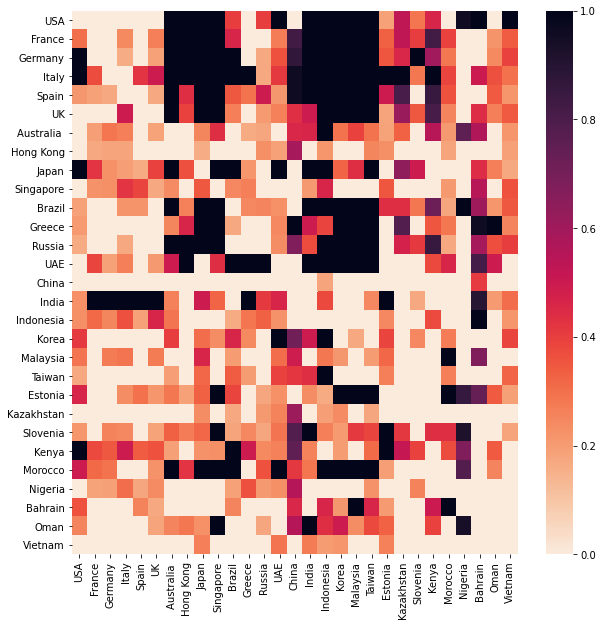

In [ ]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(covid_adjacency, cmap = "rocket_r")

### Developed market network

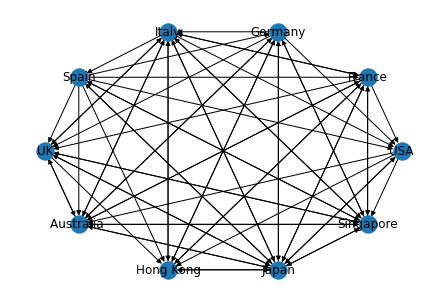

In [ ]:
covid_developed = covid_adjacency.iloc[:10,:10]

stocks = covid_developed.index.values

# Create DiGraph from A
G = nx.from_numpy_matrix(np.array(covid_developed), create_using=nx.DiGraph())

#relabels the nodes to match the  stocks names
G = nx.relabel_nodes(G,lambda x: stocks[x])

# Use spring_layout to handle positioning of graph
layout = nx.circular_layout(G)

# Draw the graph using the layout - with_labels=True if you want node labels.
nx.draw(G, layout, with_labels=True)


# Show plot
plt.show()

# nx.write_gpickle(G,'/content/gdrive/MyDrive/COMP4641/Project/Combined Period Data/covid_developed_nolabel.gpickle')
nx.write_gpickle(G,'/content/gdrive/MyDrive/COMP4641/Project/Combined Period Data/covid_developed.gpickle')


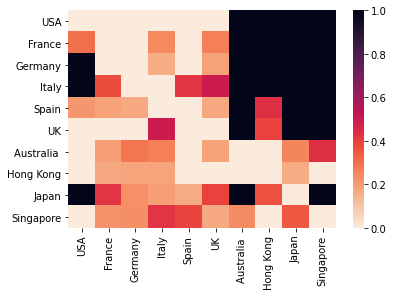

In [ ]:
sns.heatmap(covid_developed, cmap = "rocket_r")

### Emerging market network

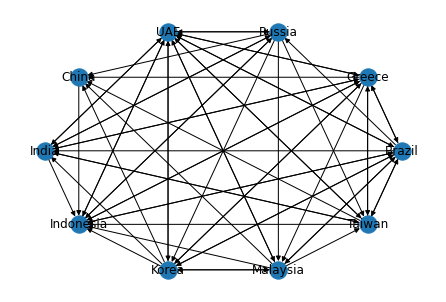

In [ ]:
covid_emerging = covid_adjacency.iloc[10:20,10:20]
stocks = covid_emerging.index.values

# Create DiGraph from A
G = nx.from_numpy_matrix(np.array(covid_emerging), create_using=nx.DiGraph())

#relabels the nodes to match the  stocks names
G = nx.relabel_nodes(G,lambda x: stocks[x])

# Use spring_layout to handle positioning of graph
layout = nx.circular_layout(G)

# Draw the graph using the layout - with_labels=True if you want node labels.
nx.draw(G, layout, with_labels=True)

# Show plot
plt.show()

# nx.write_gpickle(G,'/content/gdrive/MyDrive/COMP4641/Project/Combined Period Data/covid_emerging_nolabel.gpickle')
nx.write_gpickle(G,'/content/gdrive/MyDrive/COMP4641/Project/Combined Period Data/covid_emerging.gpickle')

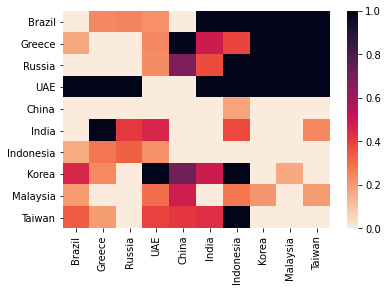

In [ ]:
sns.heatmap(covid_emerging, cmap = "rocket_r")

### Frontier market network

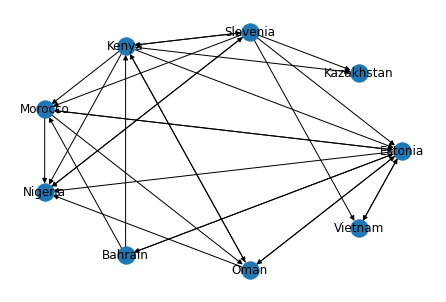

In [ ]:
covid_frontier = covid_adjacency.iloc[20:30,20:30]
stocks = covid_frontier.index.values

# Create DiGraph from A
G = nx.from_numpy_matrix(np.array(covid_frontier), create_using=nx.DiGraph())

#relabels the nodes to match the  stocks names
G = nx.relabel_nodes(G,lambda x: stocks[x])

# Use spring_layout to handle positioning of graph
layout = nx.circular_layout(G)

# Draw the graph using the layout - with_labels=True if you want node labels.
nx.draw(G, layout, with_labels=True)

# Show plot
plt.show()

# nx.write_gpickle(G, '/content/gdrive/MyDrive/COMP4641/Project/Combined Period Data/FrontierCovid_nolabel.gpickle')
nx.write_gpickle(G, '/content/gdrive/MyDrive/COMP4641/Project/Combined Period Data/FrontierCovid.gpickle')

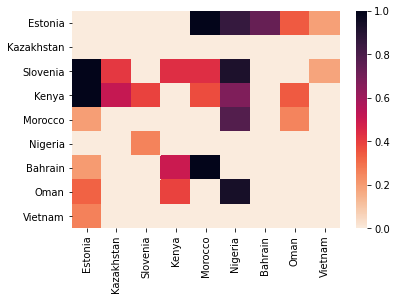

In [ ]:
sns.heatmap(covid_frontier, cmap = "rocket_r")

## Precovid

In [ ]:
precovid_p = grangers_causality_matrix(precovid, variables = precovid.columns).T
precovid_p.head()

USA  France  Germany   Italy  ...  Nigeria  Bahrain    Oman  Vietnam
USA      1.0000  0.0192   0.0046  0.0705  ...   0.0000   0.0001  0.0081   0.0000
France   0.0017  1.0000   0.1957  0.0040  ...   0.0000   0.0005  0.0036   0.0000
Germany  0.0015  0.3461   1.0000  0.1092  ...   0.0000   0.0080  0.0512   0.0000
Italy    0.0033  0.0011   0.0507  1.0000  ...   0.0003   0.0345  0.0191   0.0016
Spain    0.0034  0.0295   0.0251  0.2668  ...   0.0000   0.0001  0.0068   0.0034

[5 rows x 29 columns]

In [ ]:
columns = precovid_p.columns
precovid_adjacency = pd.DataFrame()
for idx, names in enumerate(columns):
  precovid_adjacency[names] = precovid_p[names].apply(lambda x: 1e-8 if x == 0 else x)
  precovid_adjacency[names] = precovid_adjacency[names].apply(lambda x: -np.log(x))
  precovid_adjacency[names] = precovid_adjacency[names].apply(lambda x: 0 if x < -np.log(0.05) else x)
  precovid_adjacency[names] = (precovid_adjacency[names] - precovid_adjacency[names].min()) /(precovid_adjacency[names].max() - precovid_adjacency[names].min())
  precovid_adjacency [names] = precovid_adjacency[names].fillna(0)  

### Overall Network 

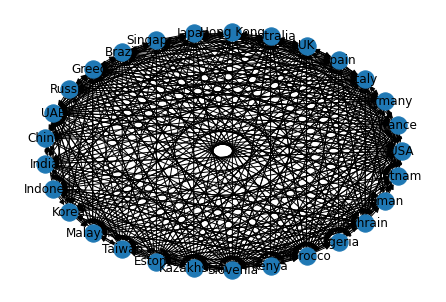

In [ ]:
stocks = precovid_adjacency.index.values

# Create DiGraph from A
G = nx.from_numpy_matrix(np.array(precovid_adjacency), create_using=nx.DiGraph())

#relabels the nodes to match the  stocks names
G = nx.relabel_nodes(G,lambda x: stocks[x])

# Use spring_layout to handle positioning of graph
layout = nx.circular_layout(G)

# Draw the graph using the layout - with_labels=True if you want node labels.
nx.draw(G, layout, with_labels=True)

# Show plot
plt.show()

# nx.write_gpickle(G, '/content/gdrive/MyDrive/COMP4641/Project/Combined Period Data/OverallPreCovid_nolabel.gpickle')
nx.write_gpickle(G, '/content/gdrive/MyDrive/COMP4641/Project/Combined Period Data/OverallPreCovid.gpickle')

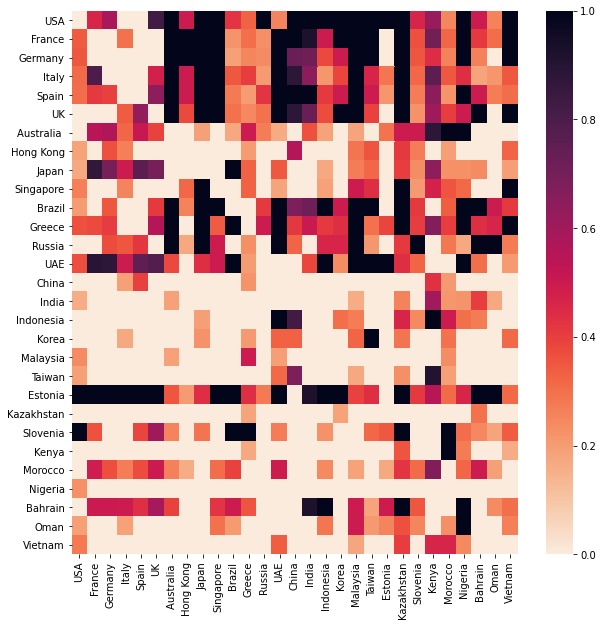

In [ ]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(precovid_adjacency, cmap = "rocket_r")

### Developed market network

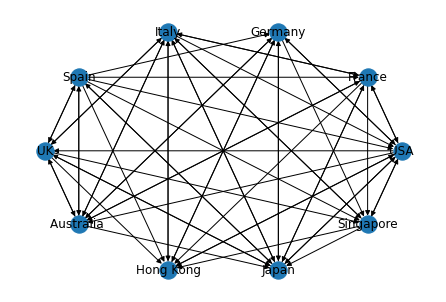

In [ ]:
precovid_developed = precovid_adjacency.iloc[:10,:10]
stocks = precovid_developed.index.values

# Create DiGraph from A
G = nx.from_numpy_matrix(np.array(precovid_developed), create_using=nx.DiGraph())

#relabels the nodes to match the  stocks names
G = nx.relabel_nodes(G,lambda x: stocks[x])

# Use spring_layout to handle positioning of graph
layout = nx.circular_layout(G)

# Draw the graph using the layout - with_labels=True if you want node labels.
nx.draw(G, layout, with_labels=True)

# Show plot
plt.show()

# nx.write_gpickle(G, '/content/gdrive/MyDrive/COMP4641/Project/Combined Period Data/DevelopedPreCovid_nolabel.gpickle')
nx.write_gpickle(G, '/content/gdrive/MyDrive/COMP4641/Project/Combined Period Data/DevelopedPreCovid.gpickle')

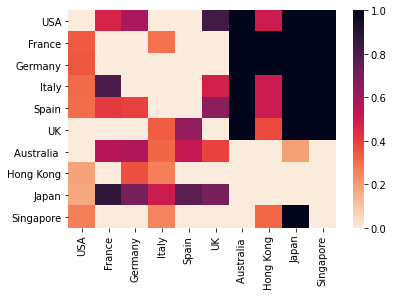

In [ ]:
sns.heatmap(precovid_developed, cmap = "rocket_r")

### Emerging market network

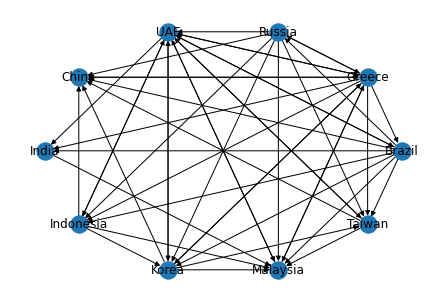

In [ ]:
precovid_emerging = precovid_adjacency.iloc[10:20,10:20]
stocks = precovid_emerging.index.values

# Create DiGraph from A
G = nx.from_numpy_matrix(np.array(precovid_emerging), create_using=nx.DiGraph())

#relabels the nodes to match the  stocks names
G = nx.relabel_nodes(G,lambda x: stocks[x])

# Use spring_layout to handle positioning of graph
layout = nx.circular_layout(G)

# Draw the graph using the layout - with_labels=True if you want node labels.
nx.draw(G, layout, with_labels=True)

# Show plot
plt.show()
# nx.write_gpickle(G, '/content/gdrive/MyDrive/COMP4641/Project/Combined Period Data/EmergingPreCovid_nolabel.gpickle')
nx.write_gpickle(G, '/content/gdrive/MyDrive/COMP4641/Project/Combined Period Data/EmergingPreCovid.gpickle')

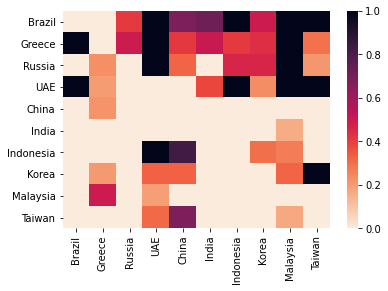

In [ ]:
sns.heatmap(precovid_emerging, cmap = "rocket_r")

### Frontier market network

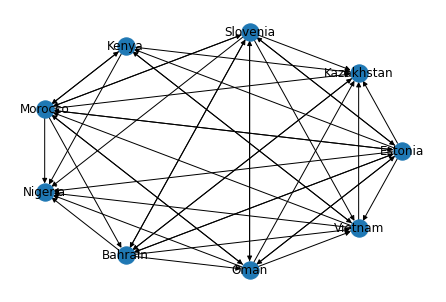

In [ ]:
precovid_frontier = precovid_adjacency.iloc[20:30,20:30]
stocks = precovid_frontier.index.values

# Create DiGraph from A
G = nx.from_numpy_matrix(np.array(precovid_frontier), create_using=nx.DiGraph())

#relabels the nodes to match the  stocks names
G = nx.relabel_nodes(G,lambda x: stocks[x])

# Use spring_layout to handle positioning of graph
layout = nx.circular_layout(G)

# Draw the graph using the layout - with_labels=True if you want node labels.
nx.draw(G, layout, with_labels=True)

# Show plot
plt.show()
# nx.write_gpickle(G, '/content/gdrive/MyDrive/COMP4641/Project/Combined Period Data/FrontierPreCovid_nolabel.gpickle')
nx.write_gpickle(G, '/content/gdrive/MyDrive/COMP4641/Project/Combined Period Data/FrontierPreCovid.gpickle')

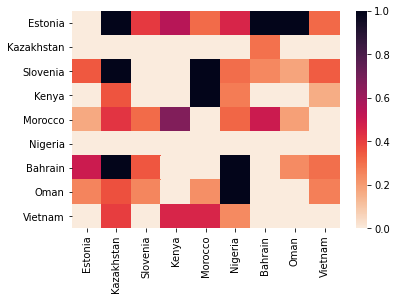

In [ ]:
sns.heatmap(precovid_frontier, cmap = "rocket_r")

## financial

In [ ]:
financial_p = grangers_causality_matrix(financial, variables = financial.columns).T
financial_p.head()

USA  France  Germany   Italy  ...  Nigeria  Bahrain    Oman  Vietnam
USA      1.0000  0.0000   0.0000  0.0002  ...   0.0318   0.0436  0.0000      0.0
France   0.3967  1.0000   0.3200  0.7347  ...   0.5939   0.1937  0.0000      0.0
Germany  0.2092  0.2918   1.0000  0.7261  ...   0.4510   0.3198  0.0001      0.0
Italy    0.5966  0.7868   0.4957  1.0000  ...   0.4816   0.3223  0.0000      0.0
Spain    0.2923  0.6645   0.6580  0.3752  ...   0.5082   0.3111  0.0001      0.0

[5 rows x 27 columns]

### Overall Network

In [ ]:
columns = financial_p.columns
financial_adjacency = pd.DataFrame()
for idx, names in enumerate(columns):
  financial_adjacency[names] = financial_p[names].apply(lambda x: 1e-8 if x == 0 else x)
  financial_adjacency[names] = financial_adjacency[names].apply(lambda x: -np.log(x))
  financial_adjacency[names] = financial_adjacency[names].apply(lambda x: 0 if x < -np.log(0.05) else x)
  financial_adjacency[names] = (financial_adjacency[names] - financial_adjacency[names].min()) /(financial_adjacency[names].max() - financial_adjacency[names].min())
  financial_adjacency [names] = financial_adjacency[names].fillna(0)  

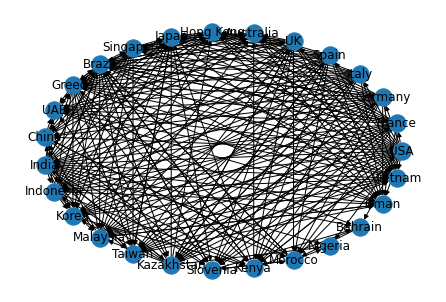

In [ ]:
G = nx.from_numpy_matrix(np.array(financial_adjacency), create_using=nx.MultiDiGraph())
stocks = financial_adjacency.index.values

# Create DiGraph from A
G = nx.from_numpy_matrix(np.array(financial_adjacency), create_using=nx.DiGraph())

#relabels the nodes to match the  stocks names
G = nx.relabel_nodes(G,lambda x: stocks[x])

# Use spring_layout to handle positioning of graph
layout = nx.circular_layout(G)

# Draw the graph using the layout - with_labels=True if you want node labels.
nx.draw(G, layout, with_labels=True)

# Show plot
plt.show()

# nx.write_gpickle(G, '/content/gdrive/MyDrive/COMP4641/Project/Combined Period Data/OverallFinancial_nolabel.gpickle')
nx.write_gpickle(G, '/content/gdrive/MyDrive/COMP4641/Project/Combined Period Data/OverallFinancial.gpickle')

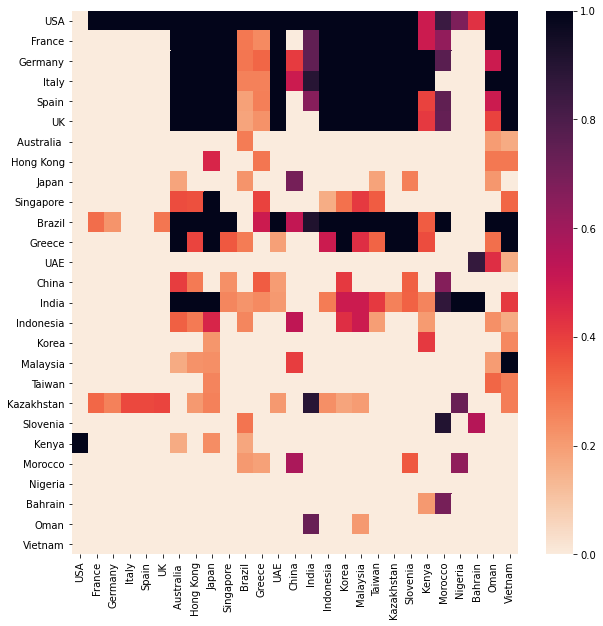

In [ ]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(financial_adjacency, cmap = "rocket_r")

### Developed market network

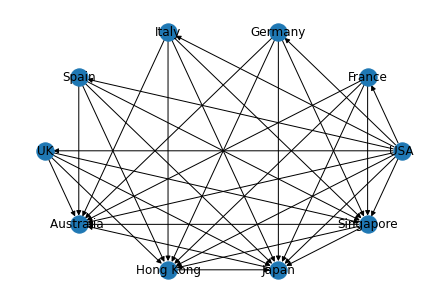

In [ ]:
financial_developed = financial_adjacency.iloc[:10,:10]
stocks = financial_developed.index.values

# Create DiGraph from A
G = nx.from_numpy_matrix(np.array(financial_developed), create_using=nx.DiGraph())

#relabels the nodes to match the  stocks names
G = nx.relabel_nodes(G,lambda x: stocks[x])

# Use spring_layout to handle positioning of graph
layout = nx.circular_layout(G)

# Draw the graph using the layout - with_labels=True if you want node labels.
nx.draw(G, layout, with_labels=True)

# Show plot
plt.show()
# nx.write_gpickle(G, '/content/gdrive/MyDrive/COMP4641/Project/Combined Period Data/DevelopedFinancial_nolabel.gpickle')
nx.write_gpickle(G, '/content/gdrive/MyDrive/COMP4641/Project/Combined Period Data/DevelopedFinancial.gpickle')

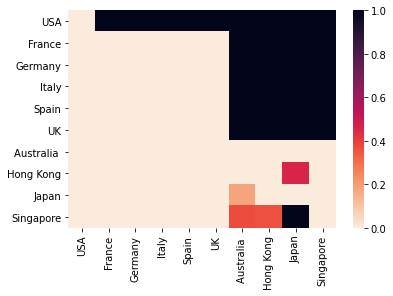

In [ ]:
sns.heatmap(financial_developed, cmap = "rocket_r")

### Emerging market network

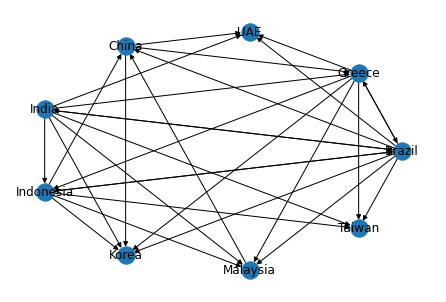

In [ ]:
financial_emerging = financial_adjacency.iloc[10:19,10:19]
stocks = financial_emerging.index.values

# Create DiGraph from A
G = nx.from_numpy_matrix(np.array(financial_emerging), create_using=nx.DiGraph())

#relabels the nodes to match the  stocks names
G = nx.relabel_nodes(G,lambda x: stocks[x])

# Use spring_layout to handle positioning of graph
layout = nx.circular_layout(G)

# Draw the graph using the layout - with_labels=True if you want node labels.
nx.draw(G, layout, with_labels=True)

# Show plot
plt.show()
# nx.write_gpickle(G, '/content/gdrive/MyDrive/COMP4641/Project/Combined Period Data/EmergingFinancial_nolabel.gpickle')
nx.write_gpickle(G, '/content/gdrive/MyDrive/COMP4641/Project/Combined Period Data/EmergingFinancial.gpickle')

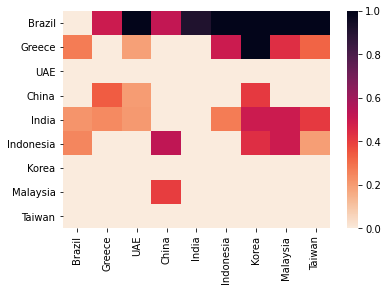

In [ ]:
sns.heatmap(financial_emerging, cmap = "rocket_r")

### Frontier market network

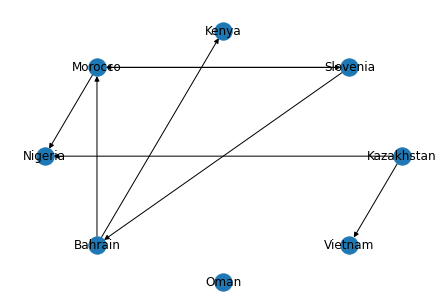

In [ ]:
financial_frontier = financial_adjacency.iloc[19:,19:]
stocks = financial_frontier.index.values
# Create DiGraph from A
G = nx.from_numpy_matrix(np.array(financial_frontier), create_using=nx.DiGraph())

#relabels the nodes to match the  stocks names
G = nx.relabel_nodes(G,lambda x: stocks[x])

# Use spring_layout to handle positioning of graph
layout = nx.circular_layout(G)

# Draw the graph using the layout - with_labels=True if you want node labels.
nx.draw(G, layout, with_labels=True)

# Show plot
plt.show()
# nx.write_gpickle(G, '/content/gdrive/MyDrive/COMP4641/Project/Combined Period Data/FrontierFinancial_nolabel.gpickle')
nx.write_gpickle(G, '/content/gdrive/MyDrive/COMP4641/Project/Combined Period Data/FrontierFinancial.gpickle')

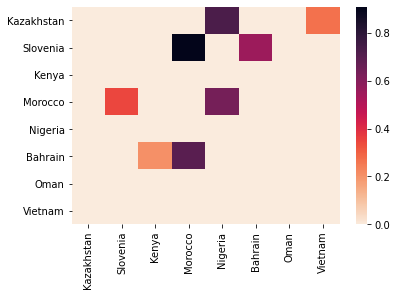

In [ ]:
sns.heatmap(financial_frontier, cmap = "rocket_r")

#Maximum Spanning Trees using Edmonds Optimum branching


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import grangercausalitytests
import pickle

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
## Function to plot Max. Spanning Tree
def plot_MST(G_mst, plot_title):  
  plt.figure(figsize =(12, 10)) 
  nx.draw_networkx(G_mst.find_optimum(),node_size=800)
  plt.title('Edmonds MST for '+ plot_title +' network')
  plt.show()

In [ ]:
## Function to sort nodes in descending order of connected nodes
def sort_nodes(G, plot_title):
  weight_sum={}
  G_mst = nx.algorithms.tree.branchings.Edmonds(G)
  plot_MST(G_mst, plot_title)
  for node in G:
    weight_sum[node]= 0.0;
    # print(node, "  ",G_mst_covid.find_optimum()[node])
    for item in G_mst.find_optimum()[node]: # find optimum branching with default weights = "max"to get max spanning tree
      # print(item)
      weight_sum[node]+= 1.0;

  sorted_tuples = sorted(weight_sum.items(), key=lambda item: item[1], reverse=True)
  print("final weights: \n", sorted_tuples)

##Covid

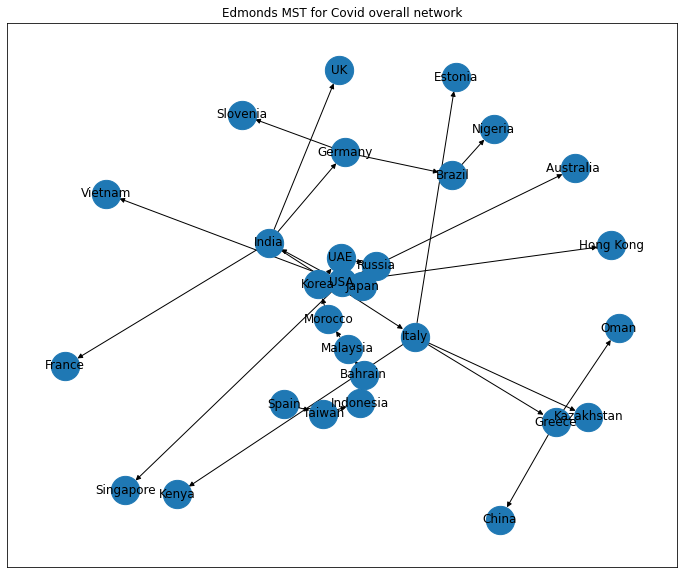

final weights: 
 [('USA', 5.0), ('Italy', 4.0), ('India', 4.0), ('Germany', 2.0), ('Greece', 2.0), ('Spain', 1.0), ('Japan', 1.0), ('Brazil', 1.0), ('Russia', 1.0), ('UAE', 1.0), ('Indonesia', 1.0), ('Korea', 1.0), ('Malaysia', 1.0), ('Taiwan', 1.0), ('Morocco', 1.0), ('Bahrain', 1.0), ('France', 0.0), ('UK', 0.0), ('Australia\xa0', 0.0), ('Hong Kong', 0.0), ('Singapore', 0.0), ('China', 0.0), ('Estonia', 0.0), ('Kazakhstan', 0.0), ('Slovenia', 0.0), ('Kenya', 0.0), ('Nigeria', 0.0), ('Oman', 0.0), ('Vietnam', 0.0)]


In [ ]:
overall_G = nx.read_gpickle("/content/gdrive/MyDrive/COMP4641/Project/Combined Period Data/OverallCovid.gpickle")
sort_nodes(overall_G, "Covid overall")

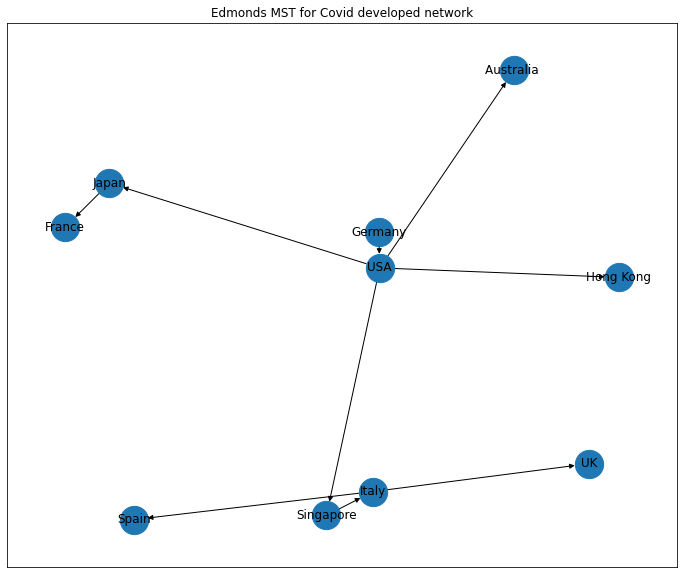

final weights: 
 [('USA', 4.0), ('Italy', 2.0), ('Germany', 1.0), ('Japan', 1.0), ('Singapore', 1.0), ('France', 0.0), ('Spain', 0.0), ('UK', 0.0), ('Australia\xa0', 0.0), ('Hong Kong', 0.0)]


In [ ]:
developed_G = nx.read_gpickle("/content/gdrive/MyDrive/COMP4641/Project/Combined Period Data/covid_developed.gpickle")
sort_nodes(developed_G, "Covid developed")

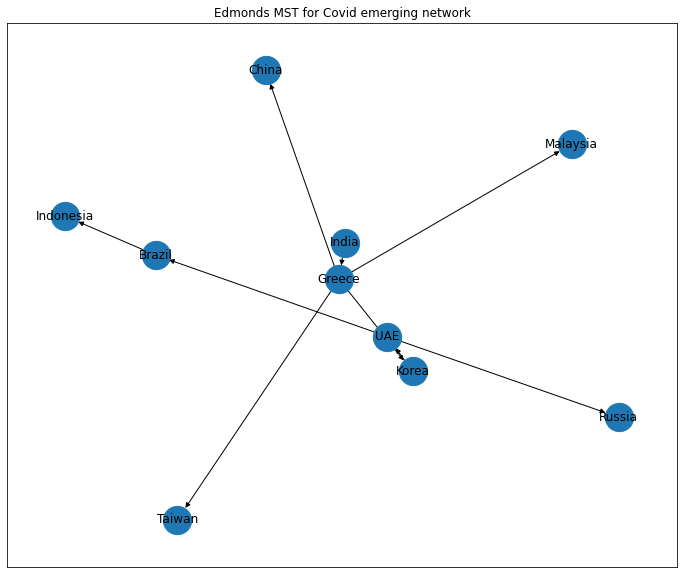

final weights: 
 [('Greece', 4.0), ('UAE', 2.0), ('Brazil', 1.0), ('India', 1.0), ('Korea', 1.0), ('Russia', 0.0), ('China', 0.0), ('Indonesia', 0.0), ('Malaysia', 0.0), ('Taiwan', 0.0)]


In [ ]:
emerging_G = nx.read_gpickle("/content/gdrive/MyDrive/COMP4641/Project/Combined Period Data/covid_emerging.gpickle")
sort_nodes(emerging_G, "Covid emerging")

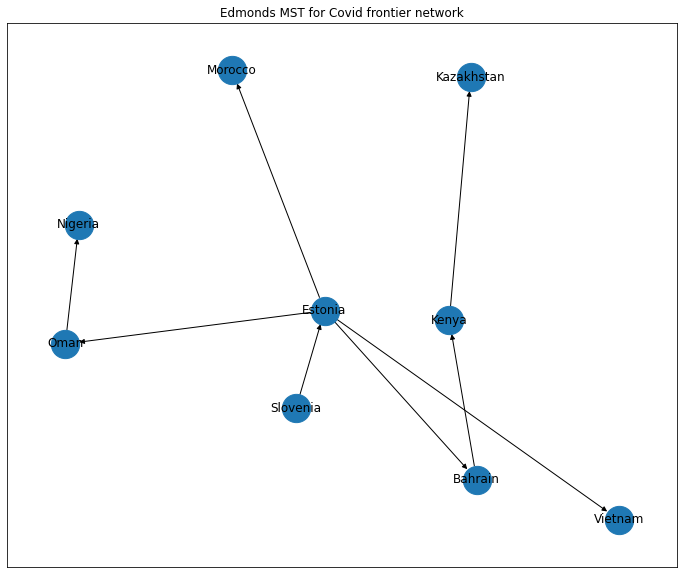

final weights: 
 [('Estonia', 4.0), ('Slovenia', 1.0), ('Kenya', 1.0), ('Bahrain', 1.0), ('Oman', 1.0), ('Kazakhstan', 0.0), ('Morocco', 0.0), ('Nigeria', 0.0), ('Vietnam', 0.0)]


In [ ]:
frontier_G = nx.read_gpickle("/content/gdrive/MyDrive/COMP4641/Project/Combined Period Data/FrontierCovid.gpickle")
sort_nodes(frontier_G, "Covid frontier")

##Pre-covid

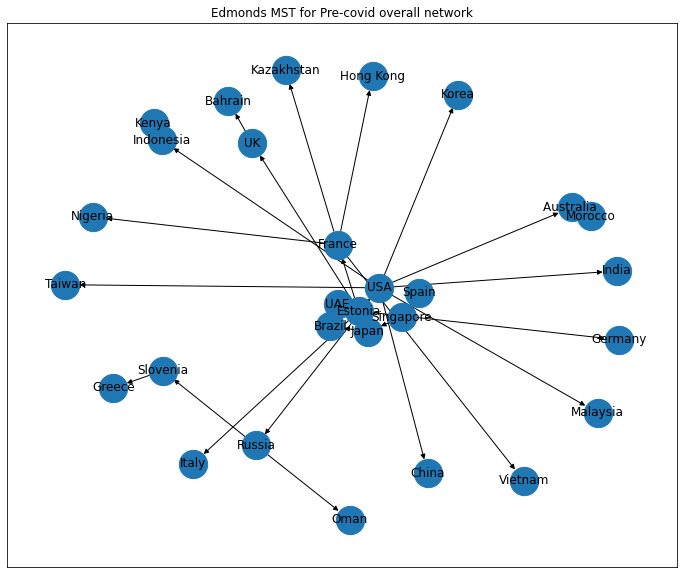

final weights: 
 [('USA', 8.0), ('Estonia', 5.0), ('France', 4.0), ('Russia', 2.0), ('Spain', 1.0), ('UK', 1.0), ('Australia\xa0', 1.0), ('Japan', 1.0), ('Singapore', 1.0), ('Brazil', 1.0), ('UAE', 1.0), ('Indonesia', 1.0), ('Slovenia', 1.0), ('Germany', 0.0), ('Italy', 0.0), ('Hong Kong', 0.0), ('Greece', 0.0), ('China', 0.0), ('India', 0.0), ('Korea', 0.0), ('Malaysia', 0.0), ('Taiwan', 0.0), ('Kazakhstan', 0.0), ('Kenya', 0.0), ('Morocco', 0.0), ('Nigeria', 0.0), ('Bahrain', 0.0), ('Oman', 0.0), ('Vietnam', 0.0)]


In [ ]:
overall_G = nx.read_gpickle("/content/gdrive/MyDrive/COMP4641/Project/Combined Period Data/OverallPreCovid.gpickle")
sort_nodes(overall_G, "Pre-covid overall")

In [ ]:
 G_mst = nx.algorithms.tree.branchings.Edmonds(overall_G)
 G_mst.find_optimum()['Spain']

AtlasView({'Singapore': {'weight': 1.0}})

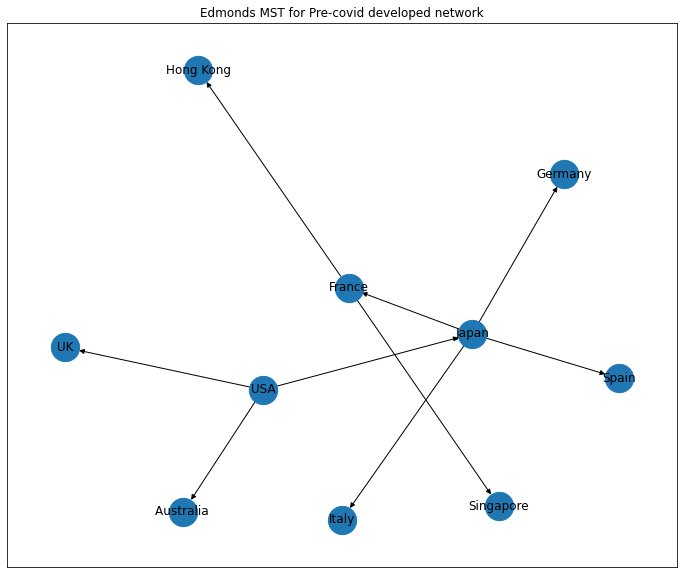

final weights: 
 [('Japan', 4.0), ('USA', 3.0), ('France', 2.0), ('Germany', 0.0), ('Italy', 0.0), ('Spain', 0.0), ('UK', 0.0), ('Australia\xa0', 0.0), ('Hong Kong', 0.0), ('Singapore', 0.0)]


In [ ]:
developed_G = nx.read_gpickle("/content/gdrive/MyDrive/COMP4641/Project/Combined Period Data/DevelopedPreCovid.gpickle")
sort_nodes(developed_G, "Pre-covid developed")

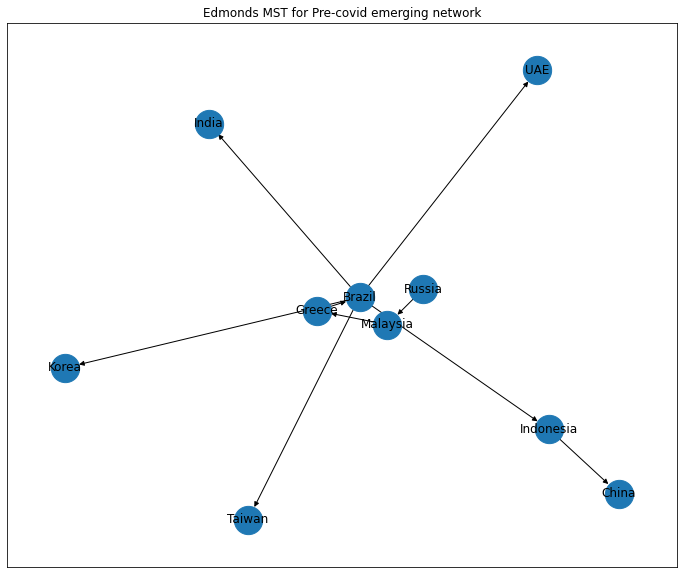

final weights: 
 [('Brazil', 5.0), ('Greece', 1.0), ('Russia', 1.0), ('Indonesia', 1.0), ('Malaysia', 1.0), ('UAE', 0.0), ('China', 0.0), ('India', 0.0), ('Korea', 0.0), ('Taiwan', 0.0)]


In [ ]:
emerging_G = nx.read_gpickle("/content/gdrive/MyDrive/COMP4641/Project/Combined Period Data/EmergingPreCovid.gpickle")
sort_nodes(emerging_G, "Pre-covid emerging")

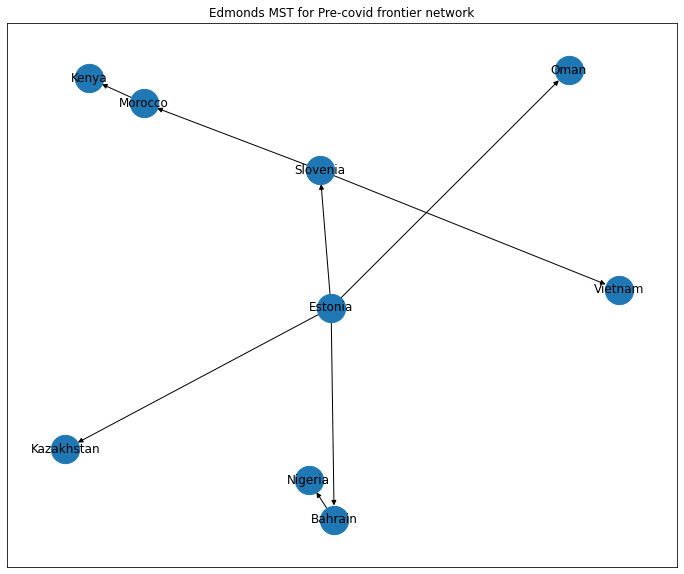

final weights: 
 [('Estonia', 4.0), ('Slovenia', 2.0), ('Morocco', 1.0), ('Bahrain', 1.0), ('Kazakhstan', 0.0), ('Kenya', 0.0), ('Nigeria', 0.0), ('Oman', 0.0), ('Vietnam', 0.0)]


In [ ]:
frontier_G = nx.read_gpickle("/content/gdrive/MyDrive/COMP4641/Project/Combined Period Data/FrontierPreCovid.gpickle")
sort_nodes(frontier_G, "Pre-covid frontier")

##Financial

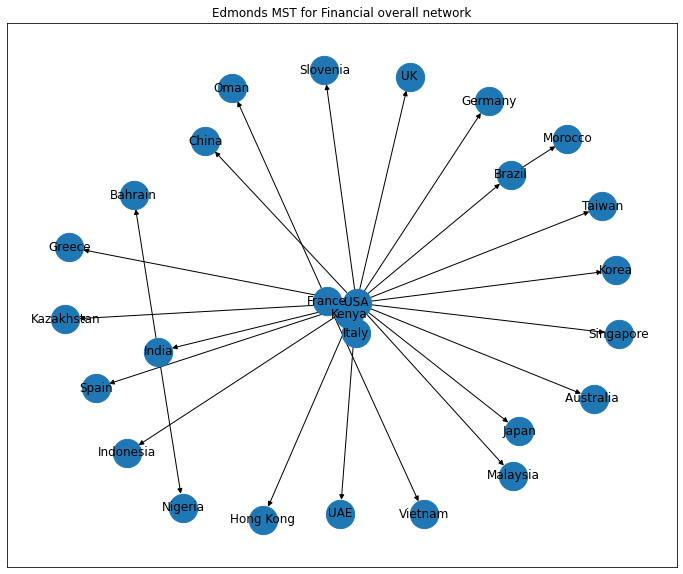

final weights: 
 [('USA', 19.0), ('France', 2.0), ('India', 2.0), ('Italy', 1.0), ('Brazil', 1.0), ('Kenya', 1.0), ('Germany', 0.0), ('Spain', 0.0), ('UK', 0.0), ('Australia\xa0', 0.0), ('Hong Kong', 0.0), ('Japan', 0.0), ('Singapore', 0.0), ('Greece', 0.0), ('UAE', 0.0), ('China', 0.0), ('Indonesia', 0.0), ('Korea', 0.0), ('Malaysia', 0.0), ('Taiwan', 0.0), ('Kazakhstan', 0.0), ('Slovenia', 0.0), ('Morocco', 0.0), ('Nigeria', 0.0), ('Bahrain', 0.0), ('Oman', 0.0), ('Vietnam', 0.0)]


In [ ]:
overall_G = nx.read_gpickle("/content/gdrive/MyDrive/COMP4641/Project/Combined Period Data/OverallFinancial.gpickle")
sort_nodes(overall_G, "Financial overall")

In [ ]:
 G_mst = nx.algorithms.tree.branchings.Edmonds(overall_G)
 G_mst.find_optimum()['USA']

AtlasView({'France': {'weight': 1.0}, 'Germany': {'weight': 1.0}, 'Spain': {'weight': 1.0}, 'UK': {'weight': 1.0}, 'Australia\xa0': {'weight': 1.0}, 'Hong Kong': {'weight': 1.0}, 'Japan': {'weight': 1.0}, 'Singapore': {'weight': 1.0}, 'Brazil': {'weight': 1.0}, 'Greece': {'weight': 1.0}, 'UAE': {'weight': 1.0}, 'China': {'weight': 1.0}, 'India': {'weight': 1.0}, 'Indonesia': {'weight': 1.0}, 'Korea': {'weight': 1.0}, 'Malaysia': {'weight': 1.0}, 'Taiwan': {'weight': 1.0}, 'Kazakhstan': {'weight': 1.0}, 'Slovenia': {'weight': 1.0}})

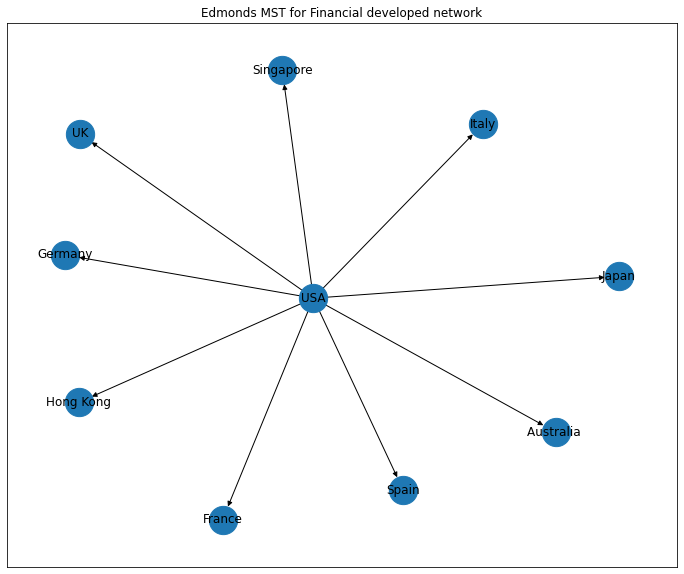

final weights: 
 [('USA', 9.0), ('France', 0.0), ('Germany', 0.0), ('Italy', 0.0), ('Spain', 0.0), ('UK', 0.0), ('Australia\xa0', 0.0), ('Hong Kong', 0.0), ('Japan', 0.0), ('Singapore', 0.0)]


In [ ]:
developed_G = nx.read_gpickle("/content/gdrive/MyDrive/COMP4641/Project/Combined Period Data/DevelopedFinancial.gpickle")
sort_nodes(developed_G, "Financial developed")

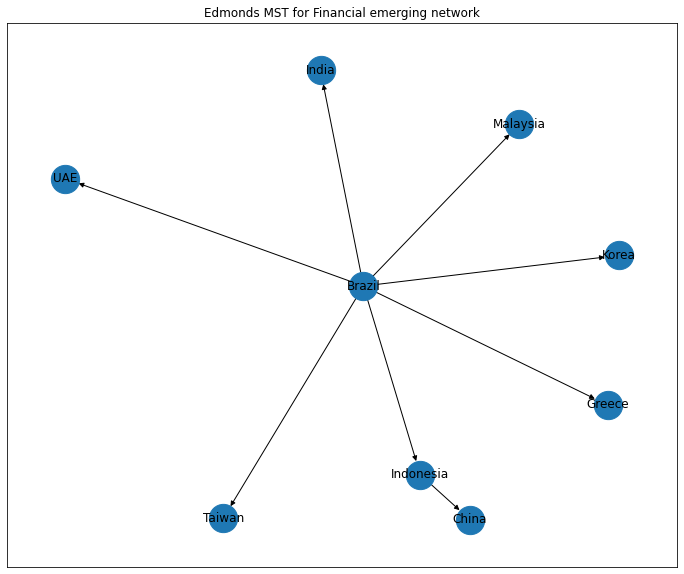

final weights: 
 [('Brazil', 7.0), ('Indonesia', 1.0), ('Greece', 0.0), ('UAE', 0.0), ('China', 0.0), ('India', 0.0), ('Korea', 0.0), ('Malaysia', 0.0), ('Taiwan', 0.0)]


In [ ]:
emerging_G = nx.read_gpickle("/content/gdrive/MyDrive/COMP4641/Project/Combined Period Data/EmergingFinancial.gpickle")
sort_nodes(emerging_G, "Financial emerging")

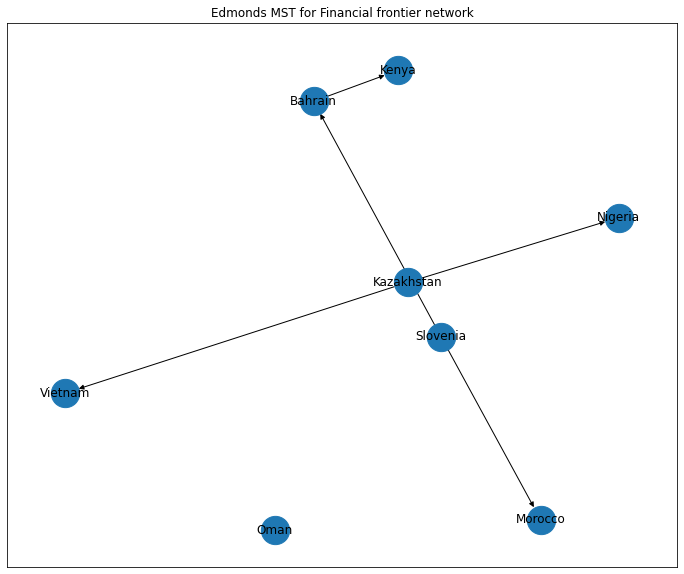

final weights: 
 [('Kazakhstan', 2.0), ('Slovenia', 2.0), ('Bahrain', 1.0), ('Kenya', 0.0), ('Morocco', 0.0), ('Nigeria', 0.0), ('Oman', 0.0), ('Vietnam', 0.0)]


In [ ]:
frontier_G = nx.read_gpickle("/content/gdrive/MyDrive/COMP4641/Project/Combined Period Data/FrontierFinancial.gpickle")
sort_nodes(frontier_G, "Financial frontier")

[link text](https:// [link text](https://))# Net Flow

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import grangercausalitytests
import pickle

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
financial = nx.read_gpickle("/content/gdrive/MyDrive/COMP4641/Project/Combined Period Data/OverallFinancial.gpickle")
precovid = nx.read_gpickle("/content/gdrive/MyDrive/COMP4641/Project/Combined Period Data/OverallPreCovid.gpickle")
covid = nx.read_gpickle("/content/gdrive/MyDrive/COMP4641/Project/Combined Period Data/OverallCovid.gpickle")

In [ ]:
def netFlowCalculator(G):
    nodes = {}
    for node in G.nodes:
        nodes[node]=0
    for edge in G.edges(data=True):
        w = edge[2]['weight']
        nodes[edge[0]]+=w
        nodes[edge[1]]-=w
    net_flow_df = pd.DataFrame([{"Country": country, "Net Flow": net} for country, net in nodes.items()])
    net_flow_df.sort_values(by = 'Net Flow', ascending = False, inplace = True)

    return net_flow_df

financial_net_flow_old = netFlowCalculator(financial)
precovid_net_flow_old = netFlowCalculator(precovid)
covid_net_flow_old = netFlowCalculator(covid)


In [ ]:
def netFlowCalculatorWithIO(G):
    nodes = {}
    for node in G.nodes:
        nodes[node]={'Net Flow':0, 'Net Incoming':0,'Net Outgoing':0}
    for edge in G.edges(data=True):
        w = edge[2]['weight']
        nodes[edge[0]]['Net Flow']+=w
        nodes[edge[0]]['Net Outgoing']+=w
        nodes[edge[1]]['Net Flow']-=w
        nodes[edge[1]]['Net Incoming']+=w

    net_flow_df = pd.DataFrame([{"Country": country, "Net Flow": net['Net Flow'], "Net Incoming": net["Net Incoming"], "Net Outgoing": net["Net Outgoing"]} for country, net in nodes.items()])
    net_flow_df.sort_values(by = 'Net Flow', ascending = False, inplace = True)

    return net_flow_df

financial_net_flow = netFlowCalculatorWithIO(financial)
precovid_net_flow = netFlowCalculatorWithIO(precovid)
covid_net_flow = netFlowCalculatorWithIO(covid)


In [ ]:
import matplotlib.pyplot as plt
def NetFlowHistogram(df):
    net_flows = df['Net Flow']
    countries = df['Country']
    fig = plt.figure()
    plt.figure(figsize=(35, 10))
    plt.bar(countries,net_flows,width=0.8)
    plt.show()    

<Figure size 432x288 with 0 Axes>

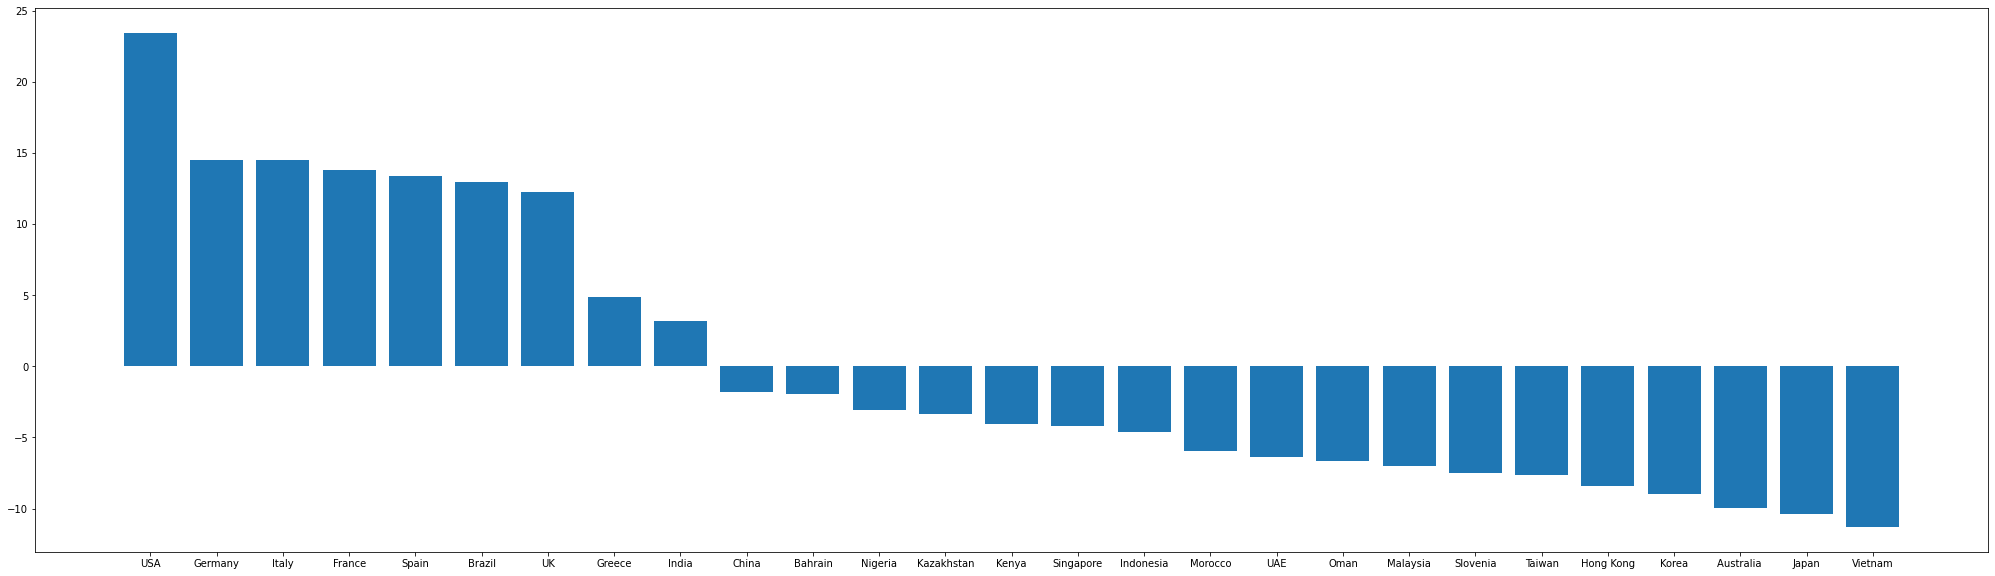

<Figure size 432x288 with 0 Axes>

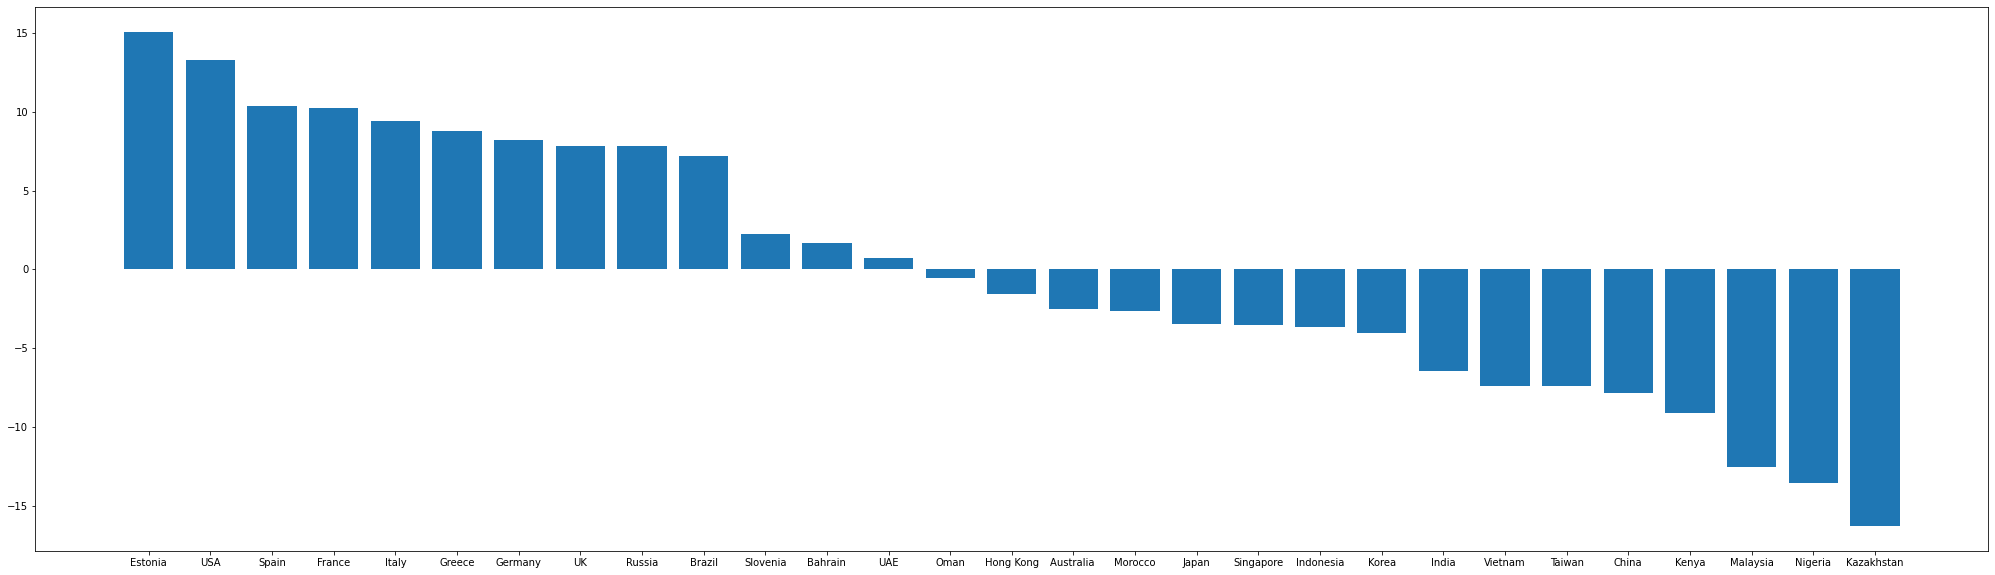

<Figure size 432x288 with 0 Axes>

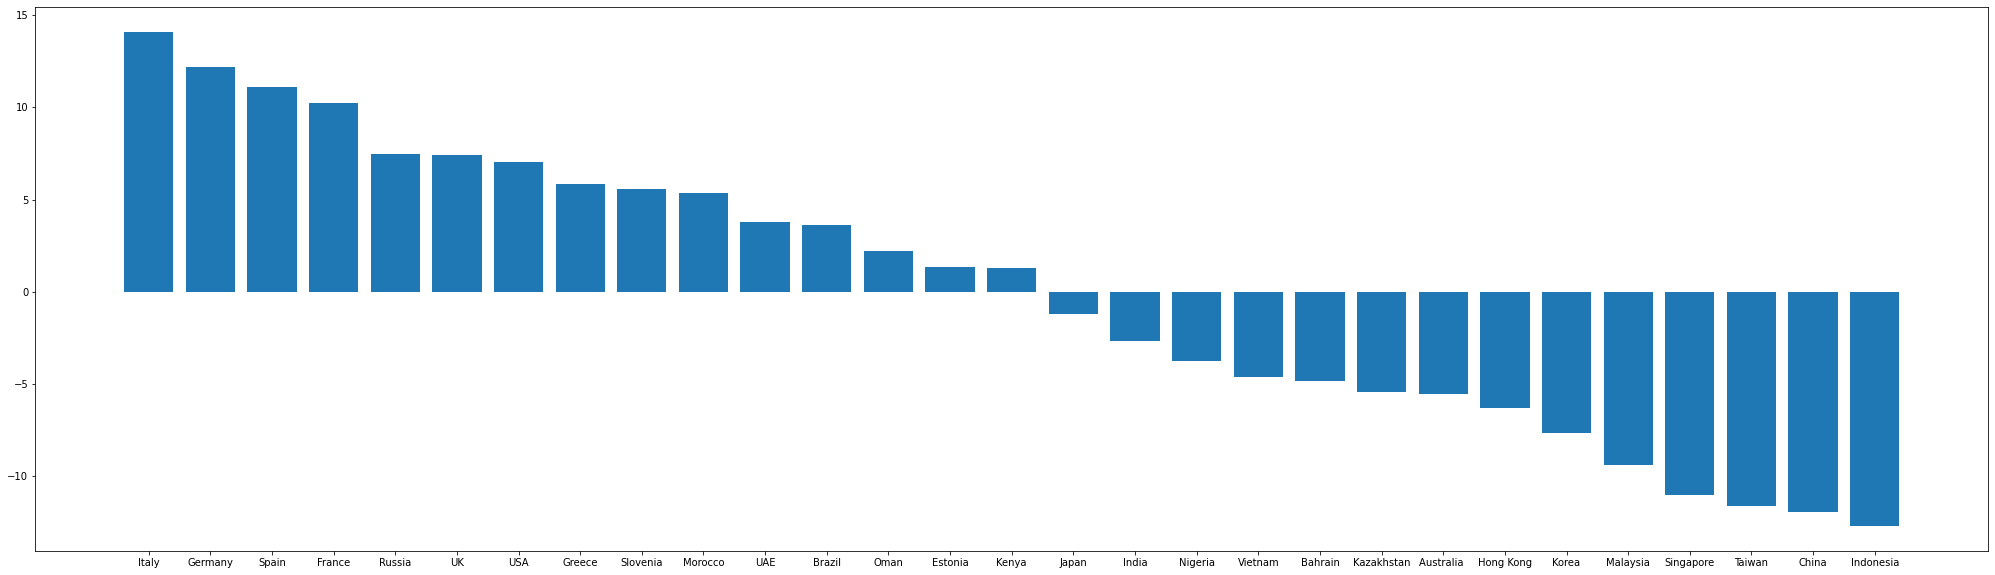

In [ ]:
NetFlowHistogram(financial_net_flow)
NetFlowHistogram(precovid_net_flow)
NetFlowHistogram(covid_net_flow)

In [ ]:
financial_net_flow

Country   Net Flow  Net Incoming  Net Outgoing
0          USA  23.459383      1.000000     24.459383
2      Germany  14.552305      1.482673     16.034978
3        Italy  14.542911      1.380299     15.923210
1       France  13.789032      1.622662     15.411695
4        Spain  13.380375      1.380720     14.761095
10      Brazil  12.964302      4.125490     17.089792
5           UK  12.277917      1.675839     13.953756
11      Greece   4.859976      4.288311      9.148287
14       India   3.165328      6.589184      9.754513
13       China  -1.778341      4.640579      2.862238
24     Bahrain  -1.943044      2.848343      0.905298
23     Nigeria  -3.048808      3.048808      0.000000
19  Kazakhstan  -3.352573      8.264898      4.912326
21       Kenya  -4.019773      5.602317      1.582544
9    Singapore  -4.160854      7.830114      3.669259
15   Indonesia  -4.581688      8.172404      3.590716
22     Morocco  -5.925006      7.886089      1.961083
12         UAE  -6.341933      7.808564      1.466631
25        Oman  -6.649683      7.589654      0.939971
17    Malaysia  -7.032349      9.261728      2.229378
20    Slovenia  -7.523209      9.278551      1.755342
18      Taiwan  -7.612939      8.461282      0.848342
7    Hong Kong  -8.426408      9.744264      1.317856
16       Korea  -8.955166      9.831457      0.876291
6   Australia   -9.983509     10.627985      0.644476
8        Japan -10.354263     12.127482      1.773219
26     Vietnam -11.301982     11.301982      0.000000

In [ ]:
precovid_net_flow

Country   Net Flow  Net Incoming  Net Outgoing
20     Estonia  15.066433      4.460594     19.527027
0          USA  13.303365      6.178130     19.481495
4        Spain  10.351343      5.663138     16.014481
1       France  10.215933      6.718613     16.934546
3        Italy   9.387833      5.165822     14.553655
11      Greece   8.764274      6.616308     15.380581
2      Germany   8.185084      6.507105     14.692189
5           UK   7.815752      7.487945     15.303697
12      Russia   7.795764      3.866805     11.662569
10      Brazil   7.168881      8.033359     15.202240
22    Slovenia   2.221018      6.926946      9.147963
26     Bahrain   1.641969      8.565490     10.207460
13         UAE   0.701629     12.902774     13.604402
27        Oman  -0.550329      4.802715      4.252386
7    Hong Kong  -1.564738      4.999253      3.434515
6   Australia   -2.491831     11.030209      8.538378
24     Morocco  -2.613869      9.267919      6.654049
8        Japan  -3.470635     11.787585      8.316950
9    Singapore  -3.530096     10.368763      6.838667
16   Indonesia  -3.684978      9.064029      5.379052
17       Korea  -4.017242      7.514863      3.497621
15       India  -6.462544      8.852751      2.390207
28     Vietnam  -7.411208      9.781166      2.369958
19      Taiwan  -7.434526     10.128163      2.693638
14       China  -7.852475      9.305506      1.453031
23       Kenya  -9.110619     11.077124      1.966505
18    Malaysia -12.569828     13.931489      1.361662
25     Nigeria -13.559646     13.788364      0.228717
21  Kazakhstan -16.294715     16.961591      0.666875

In [ ]:
covid_net_flow

Country   Net Flow  Net Incoming  Net Outgoing
3        Italy  14.088953      5.588843     19.677797
2      Germany  12.171810      3.912766     16.084577
4        Spain  11.122256      3.463263     14.585519
1       France  10.253555      4.168187     14.421743
12      Russia   7.488351      5.411191     12.899541
5           UK   7.429200      5.403881     12.833082
0          USA   7.031611      8.204412     15.236023
11      Greece   5.830447      6.037543     11.867990
22    Slovenia   5.600128      4.594252     10.194380
24     Morocco   5.337027      7.723406     13.060433
13         UAE   3.776720      9.380550     13.157270
10      Brazil   3.604453     10.257923     13.862376
27        Oman   2.197236      4.959417      7.156652
20     Estonia   1.363541      8.985057     10.348599
23       Kenya   1.298775      9.121998     10.420773
8        Japan  -1.176718     13.960471     12.783753
15       India  -2.646647     14.048762     11.402115
25     Nigeria  -3.764287      6.897481      3.133195
28     Vietnam  -4.638613      6.156346      1.517733
26     Bahrain  -4.851334     10.200412      5.349078
21  Kazakhstan  -5.443086      7.540299      2.097212
6   Australia   -5.528616     13.216770      7.688154
7    Hong Kong  -6.309126      9.092738      2.783612
17       Korea  -7.660740     14.405671      6.744931
18    Malaysia  -9.366380     14.659939      5.293559
9    Singapore -10.988748     15.673159      4.684410
19      Taiwan -11.585100     15.934010      4.348910
14       China -11.938195     12.530162      0.591967
16   Indonesia -12.696475     17.651364      4.954890

In [ ]:
precovid_net_flow.set_index('Country',inplace=True,drop=True)
covid_net_flow.set_index('Country',inplace=True,drop=True)
financial_net_flow.set_index('Country',inplace=True,drop=True)
#new_combined_for_analysis = 

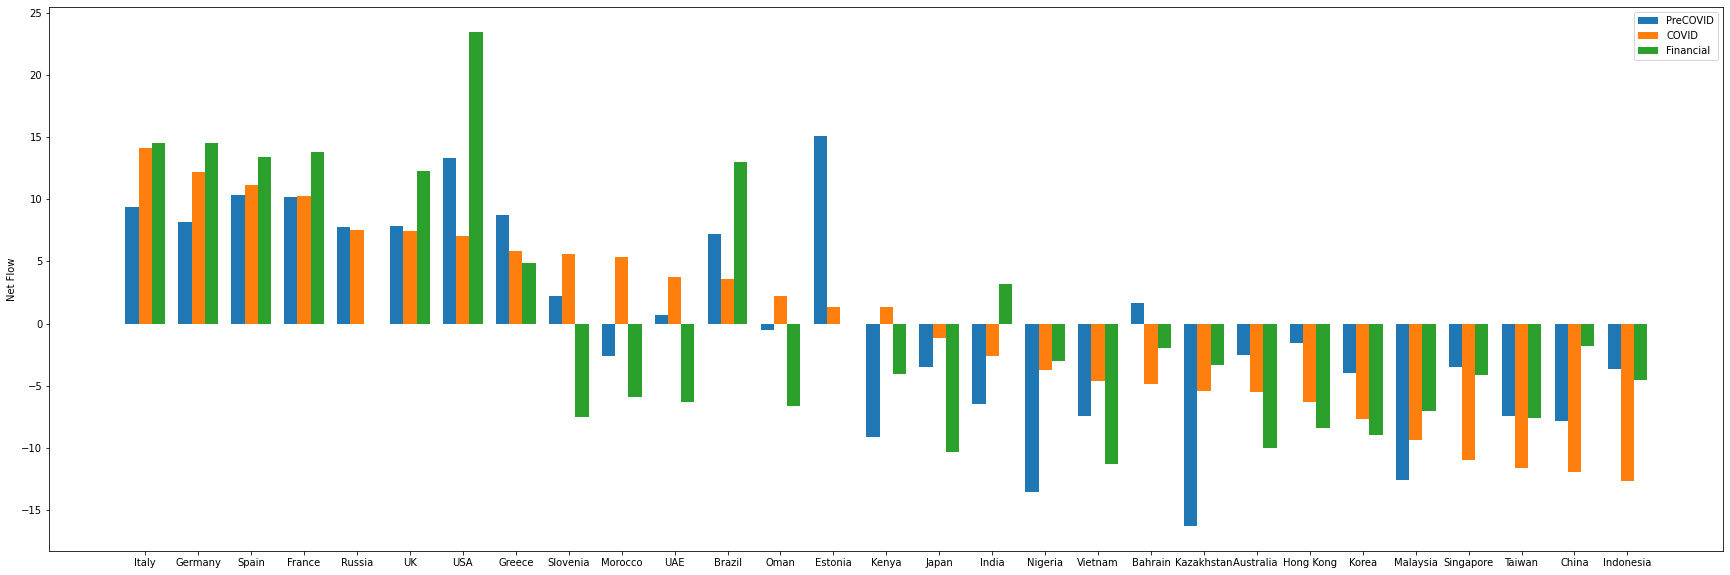

In [ ]:
#combined net flow bar graph

import matplotlib.pyplot as plt
import numpy as np 

precovid_bar_values = []
covid_bar_values = []
financial_bar_values = []
countries = []

for country in covid_net_flow.index:
    precovid_bar_values.append(precovid_net_flow.loc[country]['Net Flow'])
    covid_bar_values.append(covid_net_flow.loc[country]['Net Flow'])
    if country != 'Russia' and country != 'Estonia':
        financial_bar_values.append(financial_net_flow.loc[country]['Net Flow'])
    else:
        financial_bar_values.append(0) 
    countries.append(country)

X_axis = np.arange(len(covid_bar_values))

plt.figure(figsize=(30, 10))
plt.bar(X_axis-0.25,precovid_bar_values,0.25,label='PreCOVID')
plt.bar(X_axis,covid_bar_values,0.25,label='COVID')
plt.bar(X_axis+0.25,financial_bar_values,0.25,label='Financial')

plt.xticks(X_axis,countries)
plt.ylabel('Net Flow')
plt.legend()
plt.show()




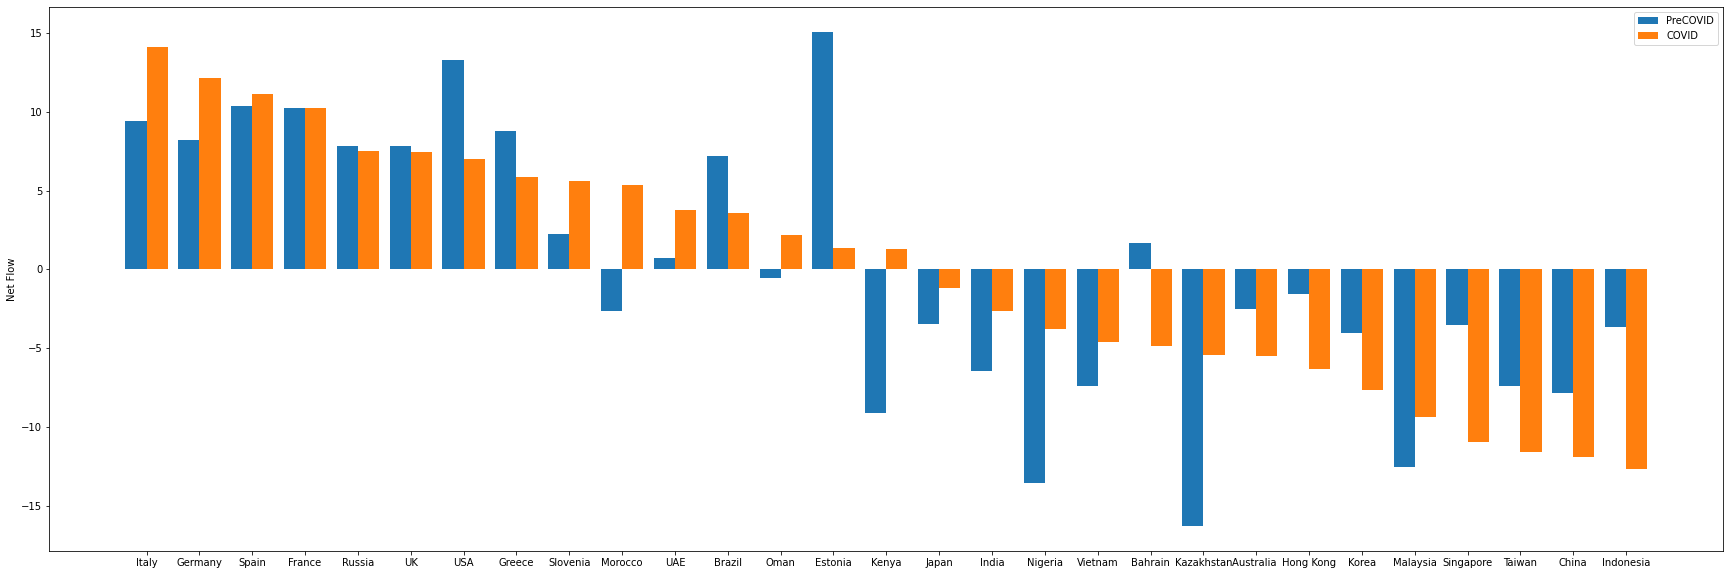

In [ ]:
#precovid vs covid bar graph

import matplotlib.pyplot as plt
import numpy as np 

precovid_bar_values = []
covid_bar_values = []
countries = []

for country in covid_net_flow.index:
    precovid_bar_values.append(precovid_net_flow.loc[country]['Net Flow'])
    covid_bar_values.append(covid_net_flow.loc[country]['Net Flow'])
    countries.append(country)

X_axis = np.arange(len(covid_bar_values))

plt.figure(figsize=(30, 10))
plt.bar(X_axis-0.2,precovid_bar_values,0.4,label='PreCOVID')
plt.bar(X_axis+0.2,covid_bar_values,0.4,label='COVID')

plt.xticks(X_axis,countries)
plt.ylabel('Net Flow')
plt.legend()
plt.show()


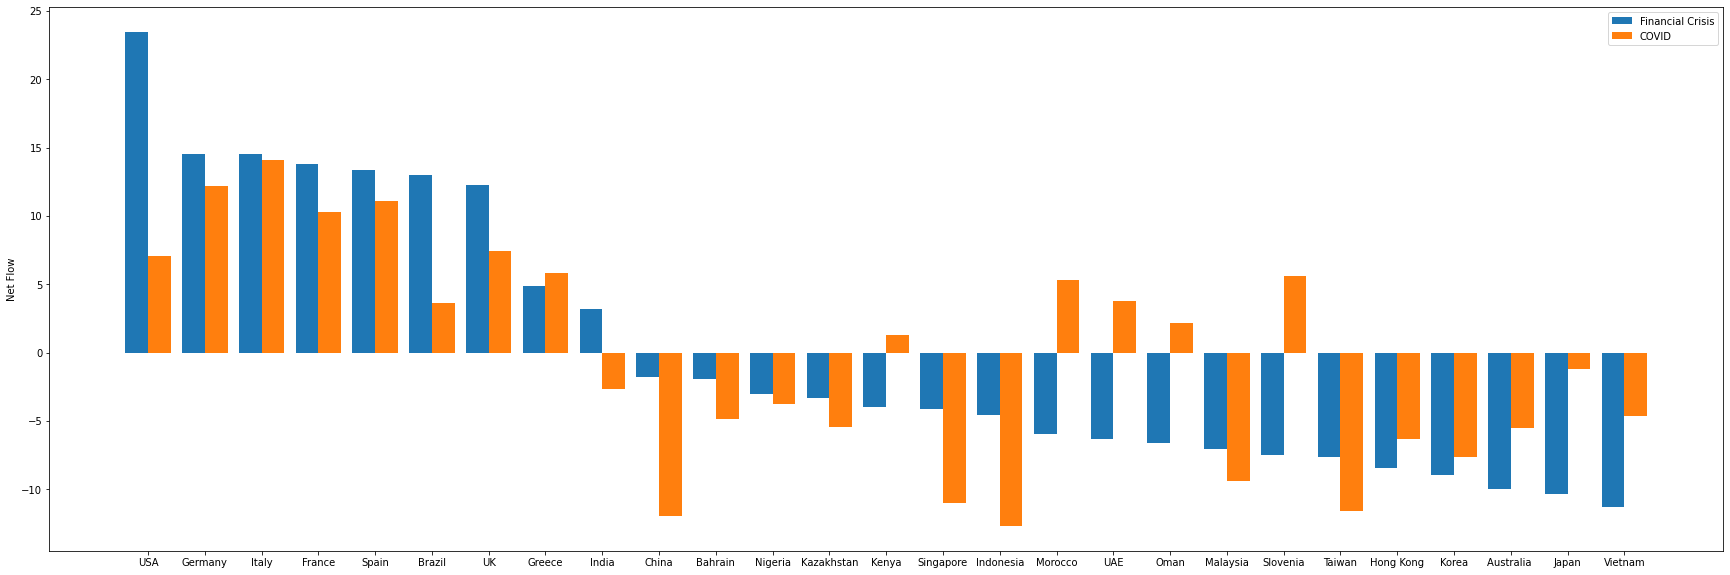

In [ ]:
#financial vs covid

import matplotlib.pyplot as plt
import numpy as np 

covid_bar_values = []
financial_bar_values = []
countries = []

for country in financial_net_flow.index:
    if country != 'Russia' and country != 'Estonia':
      covid_bar_values.append(covid_net_flow.loc[country]['Net Flow'])
      financial_bar_values.append(financial_net_flow.loc[country]['Net Flow'])
      countries.append(country)

X_axis = np.arange(len(covid_bar_values))

plt.figure(figsize=(30, 10))
plt.bar(X_axis-0.2,financial_bar_values,0.4,label='Financial Crisis')
plt.bar(X_axis+0.2,covid_bar_values,0.4,label='COVID')

plt.xticks(X_axis,countries)
plt.ylabel('Net Flow')
plt.legend()
plt.show()


In [ ]:
precovid_net_flow_old.set_index('Country',inplace=True,drop=True)
covid_net_flow_old.set_index('Country',inplace=True,drop=True)
financial_net_flow_old.set_index('Country',inplace=True,drop=True)
#new_combined_for_analysis = 

In [ ]:
def ranker(df):
    ranks = [i for i in range(1,len(df)+1)]
    df['Ranks'] = ranks
    return df

financial_net_flow_old = ranker(financial_net_flow_old)
precovid_net_flow_old = ranker(precovid_net_flow_old)
covid_net_flow_old = ranker(covid_net_flow_old)

In [ ]:
financial_net_flow = ranker(financial_net_flow)
precovid_net_flow = ranker(precovid_net_flow)
covid_net_flow = ranker(covid_net_flow)

In [ ]:
combined = {}
for i in covid_net_flow_old.index:
    currentCountry = {}
    currentCountry['PreCovid'] = precovid_net_flow_old.loc[i]['Net Flow']
    currentCountry['PreCovid Rank'] = precovid_net_flow_old.loc[i]['Ranks']
    
    currentCountry['Covid'] = covid_net_flow_old.loc[i]['Net Flow']
    currentCountry['Covid Rank'] = covid_net_flow_old.loc[i]['Ranks']
    if i != "Russia" and i != "Estonia":
        currentCountry['Financial'] = financial_net_flow_old.loc[i]['Net Flow']
        currentCountry['Financial Rank'] = financial_net_flow_old.loc[i]['Ranks']
    else:
        currentCountry['Financial'] = 'NA'
        currentCountry['Financial Rank'] = 'NA'
    combined[i] = currentCountry

combined_df = pd.DataFrame(combined)
combined_df = combined_df.T
combined_df


PreCovid PreCovid Rank    Covid Covid Rank Financial Financial Rank
Italy        9.38783             5   14.089          1   14.5429              3
Germany      8.18508             7  12.1718          2   14.5523              2
Spain        10.3513             3  11.1223          3   13.3804              5
France       10.2159             4  10.2536          4    13.789              4
Russia       7.79576             9  7.48835          5        NA             NA
UK           7.81575             8   7.4292          6   12.2779              7
USA          13.3034             2  7.03161          7   23.4594              1
Greece       8.76427             6  5.83045          8   4.85998              8
Slovenia     2.22102            11  5.60013          9  -7.52321             21
Morocco     -2.61387            17  5.33703         10  -5.92501             17
UAE         0.701629            13  3.77672         11  -6.34193             18
Brazil       7.16888            10  3.60445         12   12.9643              6
Oman       -0.550329            14  2.19724         13  -6.64968             19
Estonia      15.0664             1  1.36354         14        NA             NA
Kenya       -9.11062            26  1.29877         15  -4.01977             14
Japan       -3.47063            18 -1.17672         16  -10.3543             26
India       -6.46254            22 -2.64665         17   3.16533              9
Nigeria     -13.5596            28 -3.76429         18  -3.04881             12
Vietnam     -7.41121            23 -4.63861         19   -11.302             27
Bahrain      1.64197            12 -4.85133         20  -1.94304             11
Kazakhstan  -16.2947            29 -5.44309         21  -3.35257             13
Australia   -2.49183            16 -5.52862         22  -9.98351             25
Hong Kong   -1.56474            15 -6.30913         23  -8.42641             23
Korea       -4.01724            21 -7.66074         24  -8.95517             24
Malaysia    -12.5698            27 -9.36638         25  -7.03235             20
Singapore    -3.5301            19 -10.9887         26  -4.16085             15
Taiwan      -7.43453            24 -11.5851         27  -7.61294             22
China       -7.85248            25 -11.9382         28  -1.77834             10
Indonesia   -3.68498            20 -12.6965         29  -4.58169             16

In [ ]:
combined = {}
for i in covid_net_flow.index:
    currentCountry = {}
    currentCountry['PreCovid'] = precovid_net_flow.loc[i]['Net Flow']
    currentCountry['PreCovid Rank'] = precovid_net_flow.loc[i]['Ranks']
    currentCountry['PreCovid Incoming'] = precovid_net_flow.loc[i]['Net Incoming']    
    currentCountry['PreCovid Outgoing'] = precovid_net_flow.loc[i]['Net Outgoing']    
    
    currentCountry['Covid'] = covid_net_flow.loc[i]['Net Flow']
    currentCountry['Covid Rank'] = covid_net_flow.loc[i]['Ranks']
    currentCountry['Covid Incoming'] = covid_net_flow.loc[i]['Net Incoming']    
    currentCountry['Covid Outgoing'] = covid_net_flow.loc[i]['Net Outgoing']    
    


    if i != "Russia" and i != "Estonia":
        currentCountry['Financial'] = financial_net_flow.loc[i]['Net Flow']
        currentCountry['Financial Rank'] = financial_net_flow.loc[i]['Ranks']
    else:
        currentCountry['Financial'] = 'NA'
        currentCountry['Financial Rank'] = 'NA'
    combined[i] = currentCountry

combined_df = pd.DataFrame(combined)
combined_df = combined_df.T
combined_df


PreCovid PreCovid Rank  ... Financial Financial Rank
Italy        9.38783             5  ...   14.5429              3
Germany      8.18508             7  ...   14.5523              2
Spain        10.3513             3  ...   13.3804              5
France       10.2159             4  ...    13.789              4
Russia       7.79576             9  ...        NA             NA
UK           7.81575             8  ...   12.2779              7
USA          13.3034             2  ...   23.4594              1
Greece       8.76427             6  ...   4.85998              8
Slovenia     2.22102            11  ...  -7.52321             21
Morocco     -2.61387            17  ...  -5.92501             17
UAE         0.701629            13  ...  -6.34193             18
Brazil       7.16888            10  ...   12.9643              6
Oman       -0.550329            14  ...  -6.64968             19
Estonia      15.0664             1  ...        NA             NA
Kenya       -9.11062            26  ...  -4.01977             14
Japan       -3.47063            18  ...  -10.3543             26
India       -6.46254            22  ...   3.16533              9
Nigeria     -13.5596            28  ...  -3.04881             12
Vietnam     -7.41121            23  ...   -11.302             27
Bahrain      1.64197            12  ...  -1.94304             11
Kazakhstan  -16.2947            29  ...  -3.35257             13
Australia   -2.49183            16  ...  -9.98351             25
Hong Kong   -1.56474            15  ...  -8.42641             23
Korea       -4.01724            21  ...  -8.95517             24
Malaysia    -12.5698            27  ...  -7.03235             20
Singapore    -3.5301            19  ...  -4.16085             15
Taiwan      -7.43453            24  ...  -7.61294             22
China       -7.85248            25  ...  -1.77834             10
Indonesia   -3.68498            20  ...  -4.58169             16

[29 rows x 10 columns]

In [ ]:
def netFlowCalculatorNEWEST(G):
    nodes = {}
    for node in G.nodes:
        nodes[node]={'Net Flow':0, 'Net Flow Weight':0, 'Net Incoming':0, 'Net Incoming Weight':0, 'Net Outgoing':0,'Net Outgoing Weight':0}
    for edge in G.edges(data=True):
        w = edge[2]['weight']
        nodes[edge[0]]['Net Flow Weight']+=w
        nodes[edge[0]]['Net Flow']+=1
        nodes[edge[0]]['Net Outgoing Weight']+=w
        nodes[edge[0]]['Net Outgoing']+=1
        nodes[edge[1]]['Net Flow Weight']-=w
        nodes[edge[1]]['Net Flow']-=1
        nodes[edge[1]]['Net Incoming Weight']+=w
        nodes[edge[1]]['Net Incoming']+=1

    net_flow_df = pd.DataFrame([{"Country": country, "Net Flow": net['Net Flow'], "Net Flow Weight": net['Net Flow Weight'], "Net Incoming": net["Net Incoming"], "Net Incoming Weight": net["Net Incoming Weight"], "Net Outgoing": net["Net Outgoing"], "Net Outgoing Weight": net["Net Outgoing Weight"]} for country, net in nodes.items()])
    net_flow_df.sort_values(by = 'Net Flow Weight', ascending = False, inplace = True)

    return net_flow_df

covid_net_flow_test = netFlowCalculatorNEWEST(covid)
covid_net_flow_test

Country  Net Flow  ...  Net Outgoing  Net Outgoing Weight
3        Italy         9  ...            26            19.677797
2      Germany        10  ...            23            16.084577
4        Spain        14  ...            24            14.585519
1       France        10  ...            22            14.421743
12      Russia         2  ...            20            12.899541
5           UK         4  ...            22            12.833082
0          USA         0  ...            19            15.236023
11      Greece         5  ...            19            11.867990
22    Slovenia        12  ...            24            10.194380
24     Morocco         1  ...            20            13.060433
13         UAE        -4  ...            19            13.157270
10      Brazil         3  ...            24            13.862376
27        Oman         2  ...            16             7.156652
20     Estonia         0  ...            21            10.348599
23       Kenya         8  ...            23            10.420773
8        Japan        -1  ...            22            12.783753
15       India        -2  ...            19            11.402115
25     Nigeria         4  ...            12             3.133195
28     Vietnam       -13  ...             6             1.517733
26     Bahrain        -3  ...            12             5.349078
21  Kazakhstan        -5  ...             8             2.097212
6   Australia          0  ...            21             7.688154
7    Hong Kong        -3  ...            12             2.783612
17       Korea        -6  ...            15             6.744931
18    Malaysia        -4  ...            14             5.293559
9    Singapore        -4  ...            15             4.684410
19      Taiwan       -11  ...            12             4.348910
14       China       -17  ...             2             0.591967
16   Indonesia       -11  ...            15             4.954890

[29 rows x 7 columns]

# Pagerank

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import grangercausalitytests
import pickle

In [ ]:
financial = nx.read_gpickle("/content/gdrive/MyDrive/COMP4641/Project/Combined Period Data/OverallFinancial.gpickle")
precovid = nx.read_gpickle("/content/gdrive/MyDrive/COMP4641/Project/Combined Period Data/OverallPreCovid.gpickle")
covid = nx.read_gpickle("/content/gdrive/MyDrive/COMP4641/Project/Combined Period Data/OverallCovid.gpickle")

In [ ]:
def PageRankDF(G):
    pr = nx.pagerank(G)
    pr_df = pd.DataFrame([{"Country": country, "Page Rank": pr} for country, pr in pr.items()])
    pr_df.sort_values(by = 'Page Rank', ascending = True, inplace = True)
    pr_df.set_index('Country',inplace=True)
    return pr_df

In [ ]:
financial_pr = PageRankDF(financial)
financial_pr

Page Rank
Country              
Italy        0.011452
Spain        0.011453
Germany      0.011633
France       0.012063
UK           0.012268
Kazakhstan   0.020681
Indonesia    0.020820
UAE          0.022211
Singapore    0.022685
Taiwan       0.027846
USA          0.029021
Korea        0.033787
Greece       0.034668
Hong Kong    0.034693
Malaysia     0.036752
Kenya        0.037124
Bahrain      0.038282
Nigeria      0.038698
Australia    0.046731
Slovenia     0.047112
Brazil       0.055122
India        0.057496
Oman         0.060129
China        0.061590
Japan        0.065386
Vietnam      0.073327
Morocco      0.076969

In [ ]:
precovid_pr = PageRankDF(precovid)
precovid_pr

Page Rank
Country              
Russia       0.013391
Hong Kong    0.014326
Oman         0.015420
Estonia      0.018921
Slovenia     0.022635
Italy        0.022904
India        0.023108
Germany      0.023455
France       0.024162
Singapore    0.025530
UK           0.025954
Spain        0.026575
Brazil       0.026699
Indonesia    0.026892
Japan        0.029149
China        0.031898
Taiwan       0.032147
Vietnam      0.032207
Australia    0.032841
Korea        0.032972
Malaysia     0.041728
UAE          0.045208
Bahrain      0.049334
Nigeria      0.049730
Greece       0.054914
Kenya        0.057710
Kazakhstan   0.062772
Morocco      0.067475
USA          0.069943

In [ ]:
covid_pr = PageRankDF(covid)
covid_pr

Page Rank
Country              
Slovenia     0.015438
Oman         0.015503
Kazakhstan   0.018971
Spain        0.020723
Hong Kong    0.021277
France       0.021683
Nigeria      0.021735
Germany      0.021964
Russia       0.023941
Vietnam      0.025661
Greece       0.026775
UK           0.027462
Italy        0.027905
Kenya        0.030601
USA          0.031912
Singapore    0.037106
Australia    0.037356
Estonia      0.038269
Brazil       0.038433
Morocco      0.040550
Korea        0.040739
India        0.041338
UAE          0.041692
Japan        0.043954
Malaysia     0.044426
Taiwan       0.045977
China        0.048317
Bahrain      0.073566
Indonesia    0.076729

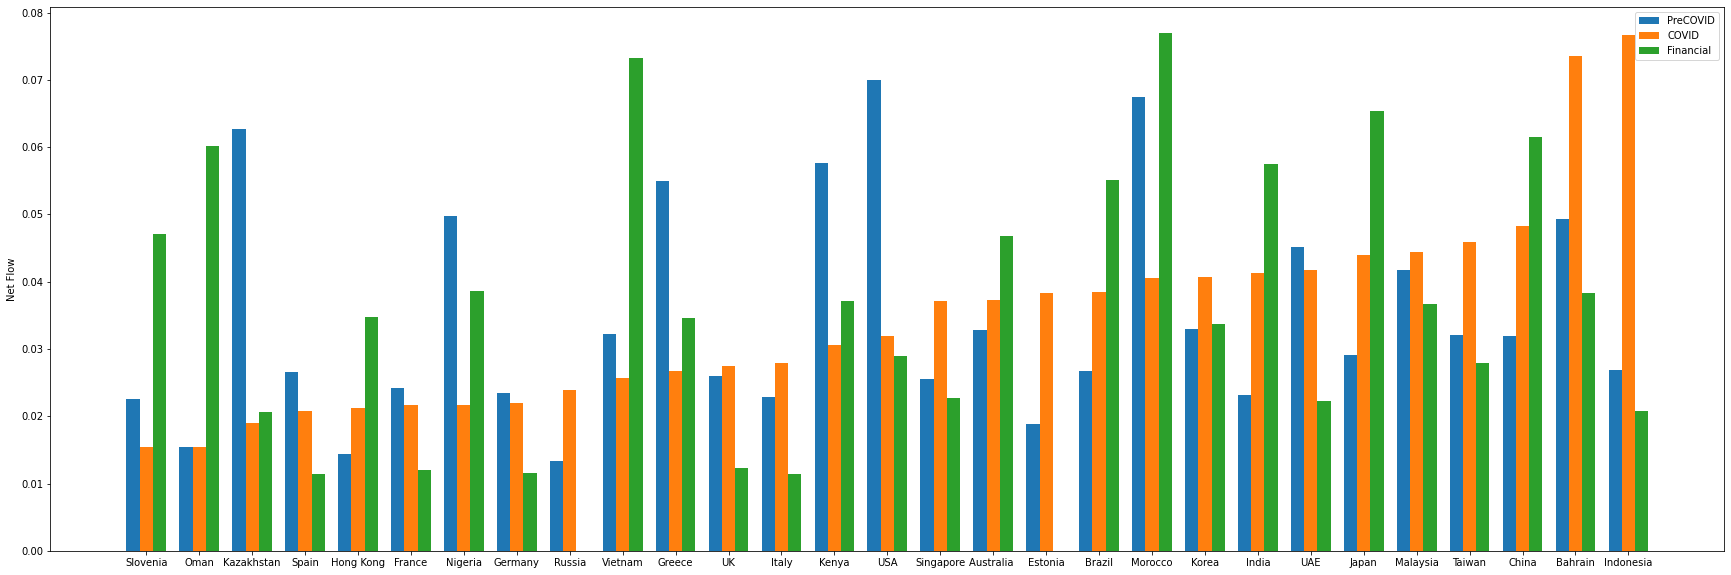

In [ ]:
#combined net flow bar graph

import matplotlib.pyplot as plt
import numpy as np 

precovid_bar_values = []
covid_bar_values = []
financial_bar_values = []
countries = []

for country in covid_pr.index:
    precovid_bar_values.append(precovid_pr.loc[country]['Page Rank'])
    covid_bar_values.append(covid_pr.loc[country]['Page Rank'])
    if country != 'Russia' and country != 'Estonia':
        financial_bar_values.append(financial_pr.loc[country]['Page Rank'])
    else:
        financial_bar_values.append(0) 
    countries.append(country)

X_axis = np.arange(len(covid_bar_values))

plt.figure(figsize=(30, 10))
plt.bar(X_axis-0.25,precovid_bar_values,0.25,label='PreCOVID')
plt.bar(X_axis,covid_bar_values,0.25,label='COVID')
plt.bar(X_axis+0.25,financial_bar_values,0.25,label='Financial')

plt.xticks(X_axis,countries)
plt.ylabel('Net Flow')
plt.legend()
plt.show()




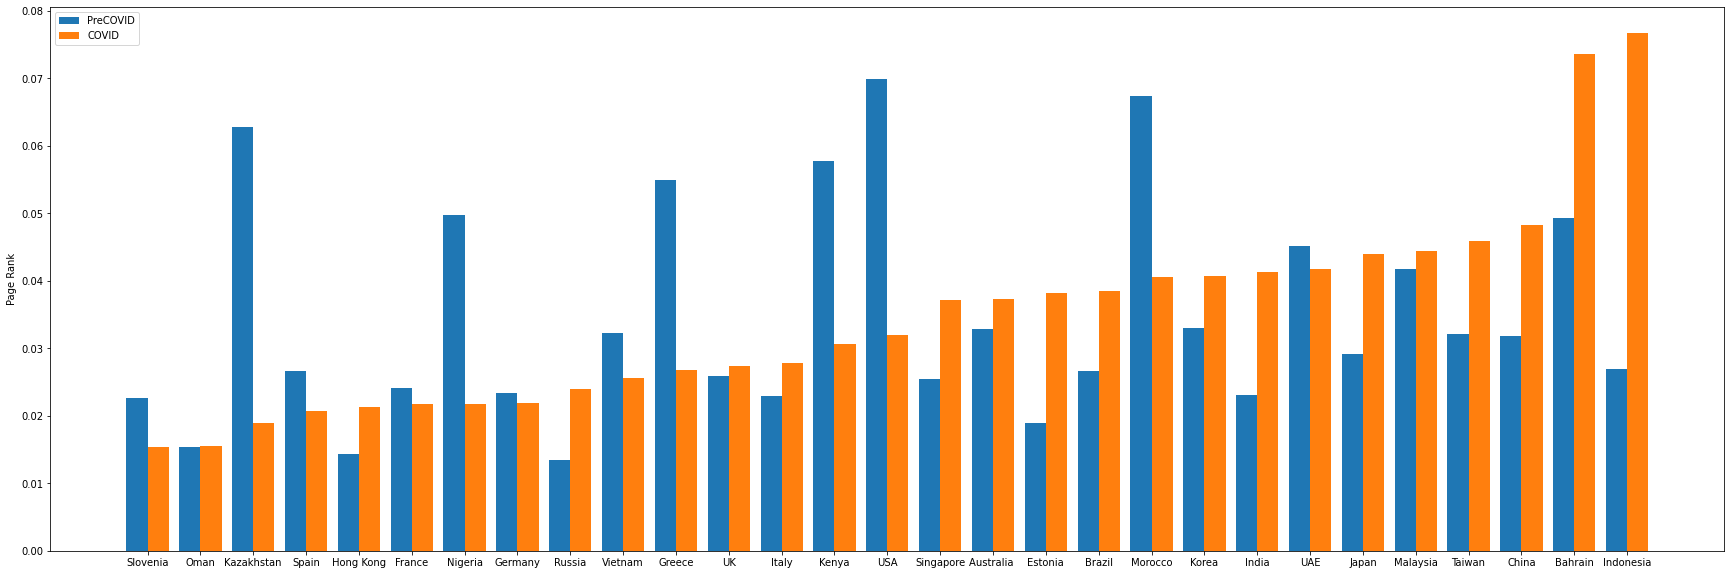

In [ ]:
#precovid vs covid bar graph

import matplotlib.pyplot as plt
import numpy as np 

precovid_bar_values = []
covid_bar_values = []
countries = []

for country in covid_pr.index:
    precovid_bar_values.append(precovid_pr.loc[country]['Page Rank'])
    covid_bar_values.append(covid_pr.loc[country]['Page Rank'])
    countries.append(country)

X_axis = np.arange(len(covid_bar_values))

plt.figure(figsize=(30, 10))
plt.bar(X_axis-0.2,precovid_bar_values,0.4,label='PreCOVID')
plt.bar(X_axis+0.2,covid_bar_values,0.4,label='COVID')

plt.xticks(X_axis,countries)
plt.ylabel('Page Rank')
plt.legend()
plt.show()


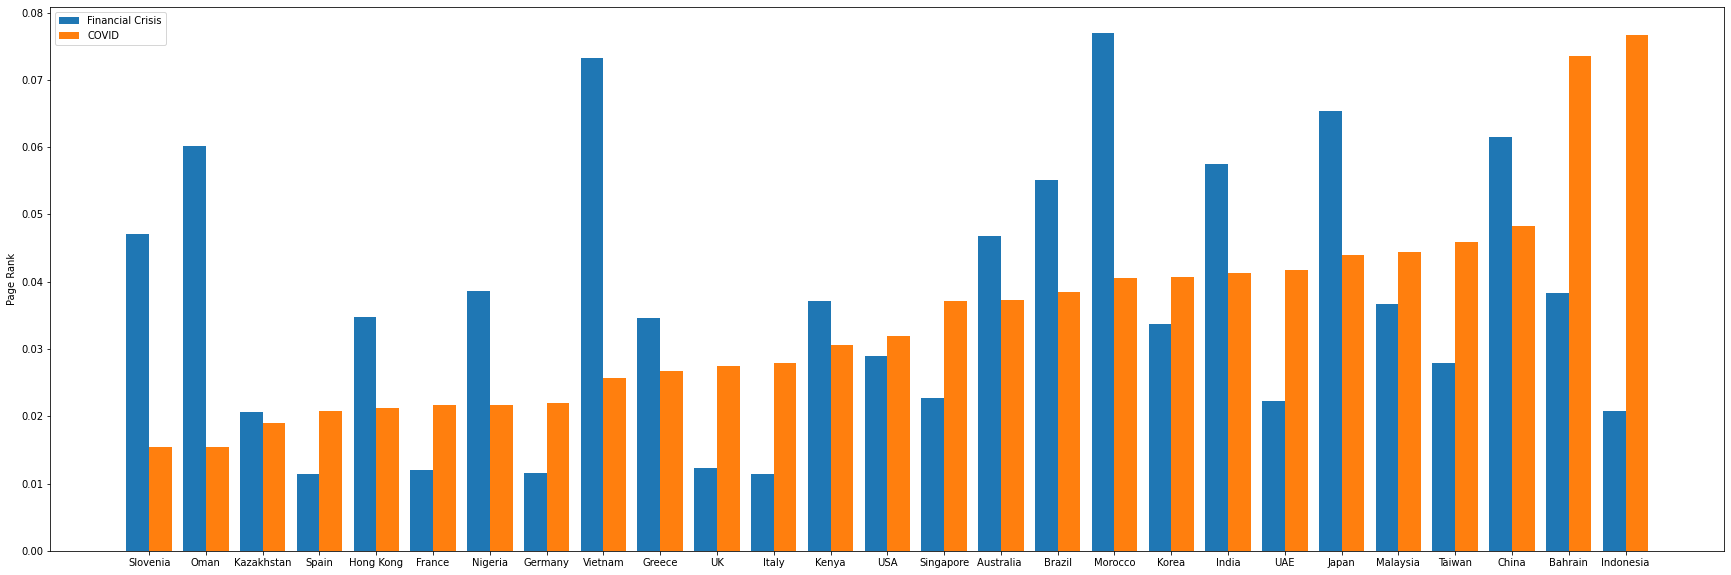

In [ ]:
#financial vs covid

import matplotlib.pyplot as plt
import numpy as np 

covid_bar_values = []
financial_bar_values = []
countries = []

for country in covid_pr.index:
    if country != 'Russia' and country != 'Estonia':
      covid_bar_values.append(covid_pr.loc[country]['Page Rank'])
      financial_bar_values.append(financial_pr.loc[country]['Page Rank'])
      countries.append(country)

X_axis = np.arange(len(covid_bar_values))

plt.figure(figsize=(30, 10))
plt.bar(X_axis-0.2,financial_bar_values,0.4,label='Financial Crisis')
plt.bar(X_axis+0.2,covid_bar_values,0.4,label='COVID')

plt.xticks(X_axis,countries)
plt.ylabel('Page Rank')
plt.legend()
plt.show()


# Spectral Clustering

In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import grangercausalitytests
from collections import defaultdict
from sklearn.cluster import KMeans 
from sklearn.cluster import SpectralClustering
import pickle

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
stocks = ['USA', 'France', 'Germany', 'Italy', 'Spain', 'UK',
       'Australia\xa0', 'Hong Kong', 'Japan', 'Singapore', 'Brazil',
       'Greece', 'Russia', 'UAE', 'China', 'India', 'Indonesia', 'Korea',
       'Malaysia', 'Taiwan', 'Estonia', 'Kazakhstan', 'Slovenia', 'Kenya',
       'Morocco', 'Nigeria', 'Bahrain', 'Oman', 'Vietnam']


stock_dict = {}
for idx, i in enumerate(stocks):
  stock_dict[idx] = i

dev_stock_dict = {}
for idx, i in enumerate(stocks[:10]):
  dev_stock_dict[idx] = i

em_stock_dict = {}
for idx, i in enumerate(stocks[10:20]):
  em_stock_dict[idx] = i

front_stock_dict = {}
for idx, i in enumerate(stocks[20:]):
  front_stock_dict[idx] = i

In [ ]:
def drawCommunities(G, partition, pos, name, label_map):
    global stock_dict
    # G is graph in networkx form
    # Partition is a dict containing info on clusters
    # Pos is base on networkx spring layout (nx.spring_layout(G))

    # For separating communities colors
    dictList = defaultdict(list)
    nodelist = []
    for node, com in partition.items():
      dictList[com].append(node)
        # dictList[com].append(stock_dict[node])

    # Get size of Communities
    size = len(set(partition.values()))
    plt.figure(3,figsize=(20,10)) 
    colors = ['red', 'yellow', 'lime', 'pink', 'cyan', 'orange', 'blue', 'm']

    # For loop to assign communities colors
    for i in range(size):
        
      
        nx.draw_networkx_nodes(G, pos,
                               nodelist=dictList[i],
                               node_color= colors[i],
                               node_size=500,
                               alpha=0.8)
        nx.draw_networkx_labels(G,pos,label_map,font_size=16,font_color='black')
    plt.title(name)
    # Draw edges and final plot
    nx.draw_networkx_edges(G, pos, alpha=0.5)


## Covid

In [ ]:
covid = nx.read_gpickle("/content/gdrive/MyDrive/COMP4641/Project/Combined Period Data/OverallCovid_nolabel.gpickle")
Devcovid = nx.read_gpickle("/content/gdrive/MyDrive/COMP4641/Project/Combined Period Data/covid_developed_nolabel.gpickle")
Emcovid = nx.read_gpickle("/content/gdrive/MyDrive/COMP4641/Project/Combined Period Data/covid_emerging_nolabel.gpickle")
Frontcovid = nx.read_gpickle("/content/gdrive/MyDrive/COMP4641/Project/Combined Period Data/FrontierCovid_nolabel.gpickle")

/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_spectral.py:482: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"


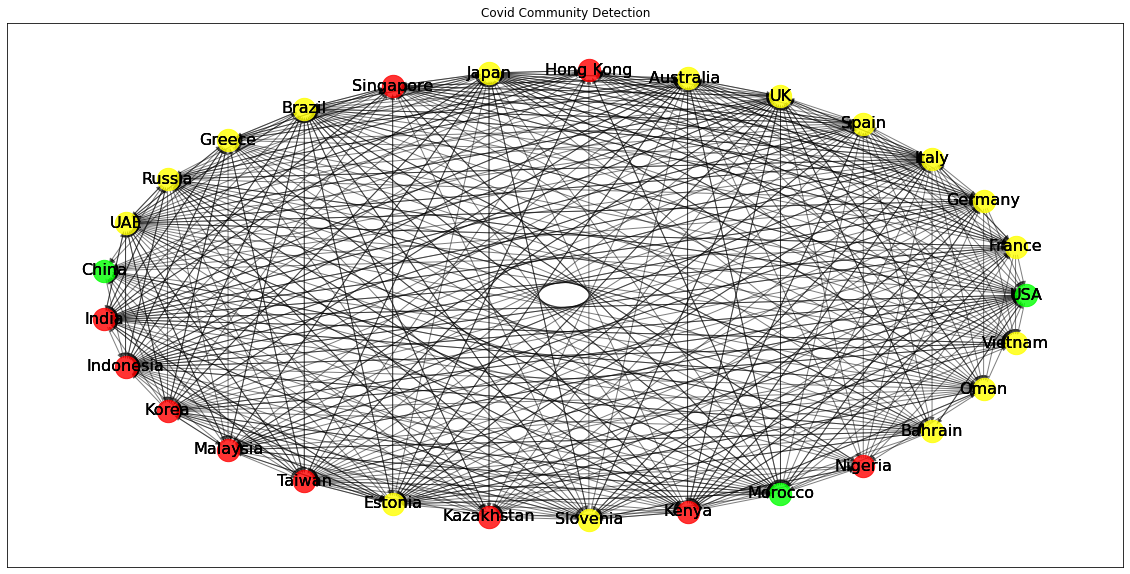

In [ ]:
lapmat= nx.directed_laplacian_matrix(covid)
clustering = SpectralClustering(n_clusters=3,assign_labels='discretize', random_state = 1).fit_predict(lapmat)

cluster_dict = {}
for idx, i in enumerate(clustering):
  cluster_dict[idx] = i
pos = nx.circular_layout(covid)
name = "Covid Community Detection"
drawCommunities(covid, cluster_dict, pos, name, stock_dict)

/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_spectral.py:482: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"


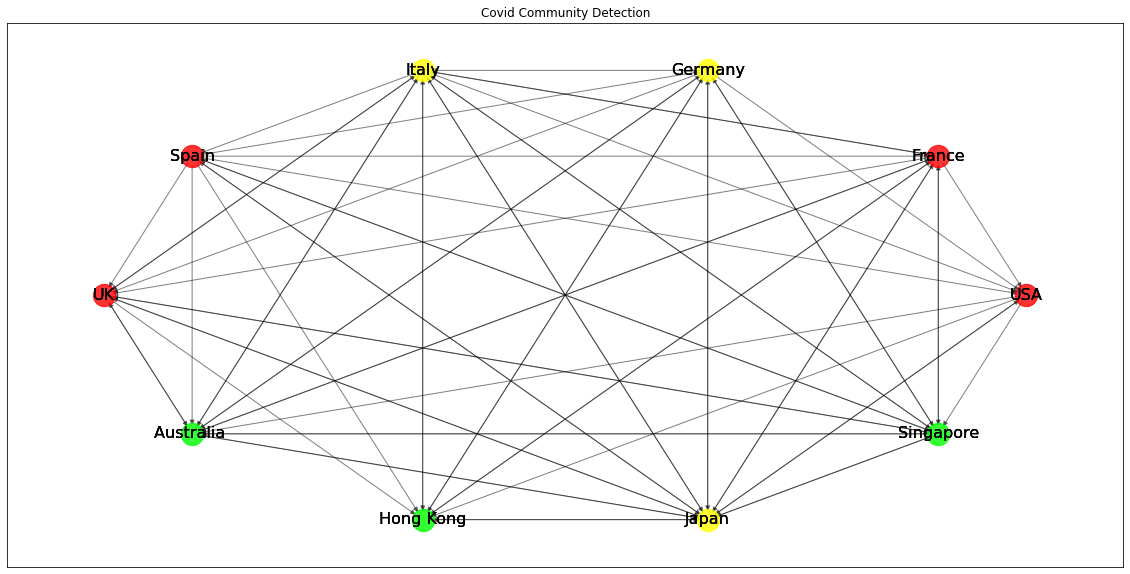

In [ ]:
lapmat= nx.directed_laplacian_matrix(Devcovid)
clustering = SpectralClustering(n_clusters=3,assign_labels='discretize', random_state = 1).fit_predict(lapmat)

cluster_dict = {}
for idx, i in enumerate(clustering):
  cluster_dict[idx] = i
pos = nx.circular_layout(Devcovid)
name = "Covid Community Detection (Developed)"
drawCommunities(Devcovid, cluster_dict, pos, name, dev_stock_dict)

/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_spectral.py:482: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"


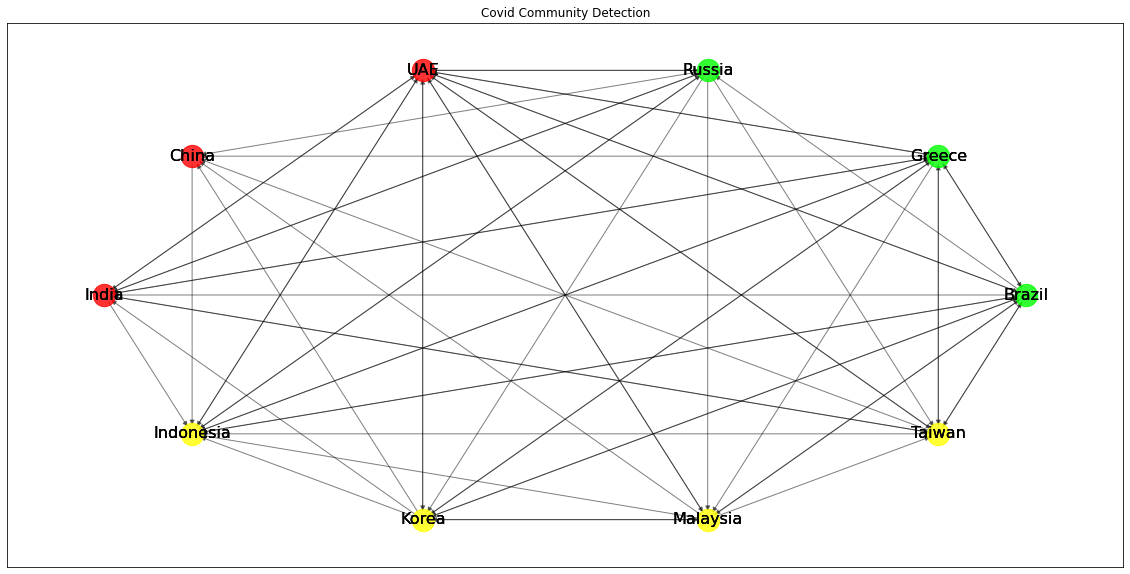

In [ ]:
lapmat= nx.directed_laplacian_matrix(Emcovid)
clustering = SpectralClustering(n_clusters=3,assign_labels='discretize', random_state = 1).fit_predict(lapmat)

cluster_dict = {}
for idx, i in enumerate(clustering):
  cluster_dict[idx] = i
pos = nx.circular_layout(Emcovid)
name = "Covid Community Detection (Emerging)"
drawCommunities(Emcovid, cluster_dict, pos, name, em_stock_dict)

/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_spectral.py:482: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"


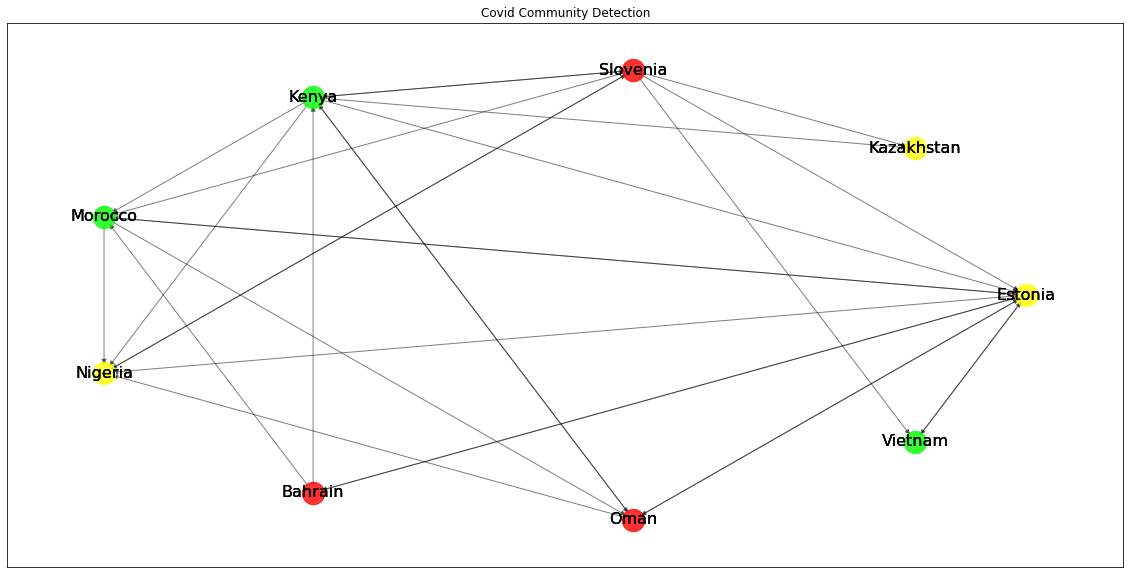

In [ ]:
lapmat= nx.directed_laplacian_matrix(Frontcovid)
clustering = SpectralClustering(n_clusters=3,assign_labels='discretize', random_state = 1).fit_predict(lapmat)

cluster_dict = {}
for idx, i in enumerate(clustering):
  cluster_dict[idx] = i
pos = nx.circular_layout(Frontcovid)
name = "Covid Community Detection (Frontier)"
drawCommunities(Frontcovid, cluster_dict, pos, name, front_stock_dict)

## PreCovid

In [ ]:
precovid = nx.read_gpickle("/content/gdrive/MyDrive/COMP4641/Project/Combined Period Data/OverallPreCovid_nolabel.gpickle")
Devprecovid = nx.read_gpickle("/content/gdrive/MyDrive/COMP4641/Project/Combined Period Data/DevelopedPreCovid_nolabel.gpickle")
Emprecovid = nx.read_gpickle("/content/gdrive/MyDrive/COMP4641/Project/Combined Period Data/EmergingPreCovid_nolabel.gpickle")
Frontprecovid = nx.read_gpickle("/content/gdrive/MyDrive/COMP4641/Project/Combined Period Data/FrontierPreCovid_nolabel.gpickle")


/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_spectral.py:482: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"


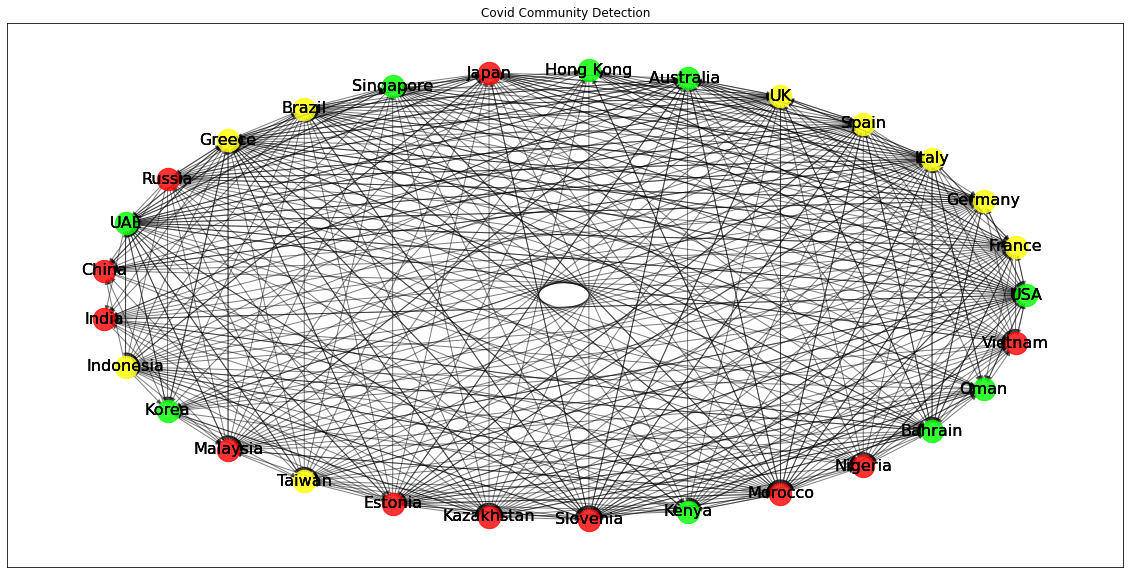

In [ ]:
lapmat= nx.directed_laplacian_matrix(precovid)
clustering = SpectralClustering(n_clusters=3,assign_labels='discretize', random_state = 1).fit_predict(lapmat)

cluster_dict = {}
for idx, i in enumerate(clustering):
  cluster_dict[idx] = i
pos = nx.circular_layout(precovid)
name = "Pre-Covid Community Detection (overall)"
drawCommunities(precovid, cluster_dict, pos, name, stock_dict)

/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_spectral.py:482: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"


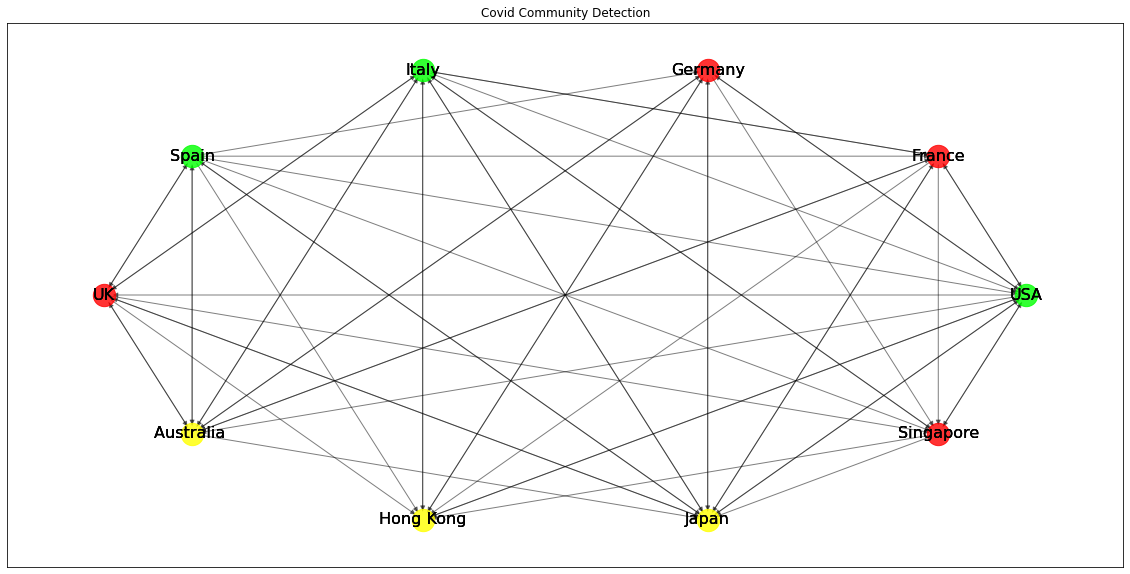

In [ ]:
lapmat= nx.directed_laplacian_matrix(Devprecovid)
clustering = SpectralClustering(n_clusters=3,assign_labels='discretize', random_state = 1).fit_predict(lapmat)

cluster_dict = {}
for idx, i in enumerate(clustering):
  cluster_dict[idx] = i
pos = nx.circular_layout(Devprecovid)
name = "Pre-Covid Community Detection (Developed)"
drawCommunities(Devprecovid, cluster_dict, pos, name, dev_stock_dict)

/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_spectral.py:482: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"


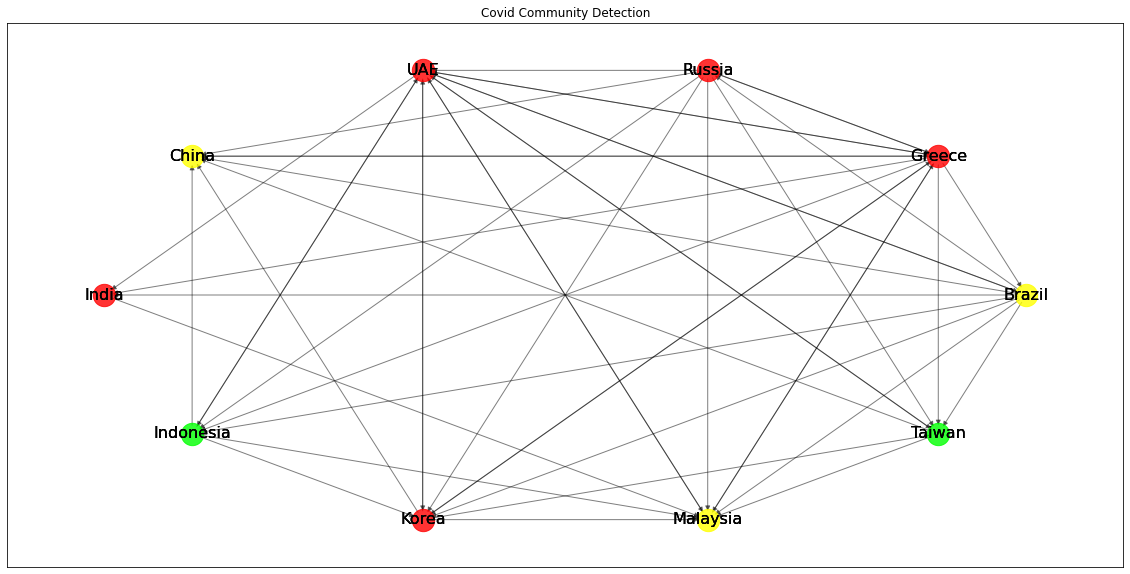

In [ ]:
lapmat= nx.directed_laplacian_matrix(Emprecovid)
clustering = SpectralClustering(n_clusters=3,assign_labels='discretize', random_state = 1).fit_predict(lapmat)

cluster_dict = {}
for idx, i in enumerate(clustering):
  cluster_dict[idx] = i
pos = nx.circular_layout(Emprecovid)
name = "Pre-Covid Community Detection (Emerging)"
drawCommunities(Emprecovid, cluster_dict, pos, name, em_stock_dict)

/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_spectral.py:482: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"


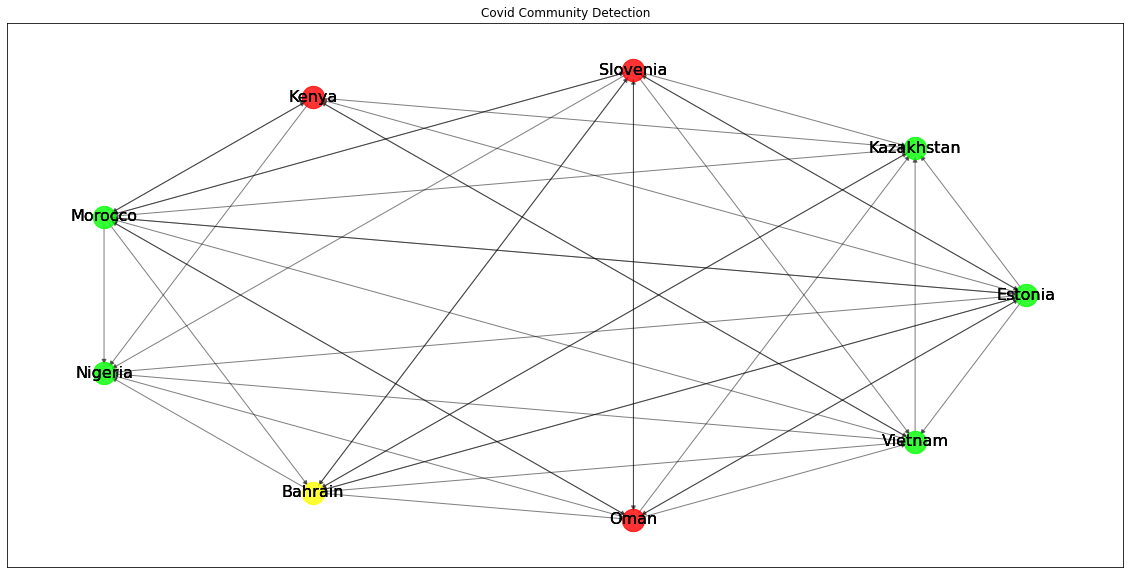

In [ ]:
lapmat= nx.directed_laplacian_matrix(Frontprecovid)
clustering = SpectralClustering(n_clusters=3,assign_labels='discretize', random_state = 1).fit_predict(lapmat)

cluster_dict = {}
for idx, i in enumerate(clustering):
  cluster_dict[idx] = i
pos = nx.circular_layout(Frontprecovid)
name = "Pre-Covid Community Detection (Frontier)"
drawCommunities(Frontprecovid, cluster_dict, pos, name, front_stock_dict)

## Financial

In [ ]:
#no russia and no estonia
fin_stocks = ['USA', 'France', 'Germany', 'Italy', 'Spain', 'UK',
       'Australia\xa0', 'Hong Kong', 'Japan', 'Singapore', 'Brazil',
       'Greece', 'UAE', 'China', 'India', 'Indonesia', 'Korea',
       'Malaysia', 'Taiwan', 'Kazakhstan', 'Slovenia', 'Kenya', 'Morocco',
       'Nigeria', 'Bahrain', 'Oman', 'Vietnam']


fin_stock_dict = {}
for idx, i in enumerate(fin_stocks):
  fin_stock_dict[idx] = i

findev_stock_dict = {}
for idx, i in enumerate(fin_stocks[:10]):
  findev_stock_dict[idx] = i

finem_stock_dict = {}
for idx, i in enumerate(fin_stocks[10:20]):
  finem_stock_dict[idx] = i

finfront_stock_dict = {}
for idx, i in enumerate(fin_stocks[20:]):
  finfront_stock_dict[idx] = i

In [ ]:
financial = nx.read_gpickle("/content/gdrive/MyDrive/COMP4641/Project/Combined Period Data/OverallFinancial_nolabel.gpickle")
Devfinancial = nx.read_gpickle("/content/gdrive/MyDrive/COMP4641/Project/Combined Period Data/DevelopedFinancial_nolabel.gpickle")
Emfinancial = nx.read_gpickle("/content/gdrive/MyDrive/COMP4641/Project/Combined Period Data/EmergingFinancial_nolabel.gpickle")
Frontfinancial = nx.read_gpickle("/content/gdrive/MyDrive/COMP4641/Project/Combined Period Data/FrontierFinancial_nolabel.gpickle")

/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_spectral.py:482: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"


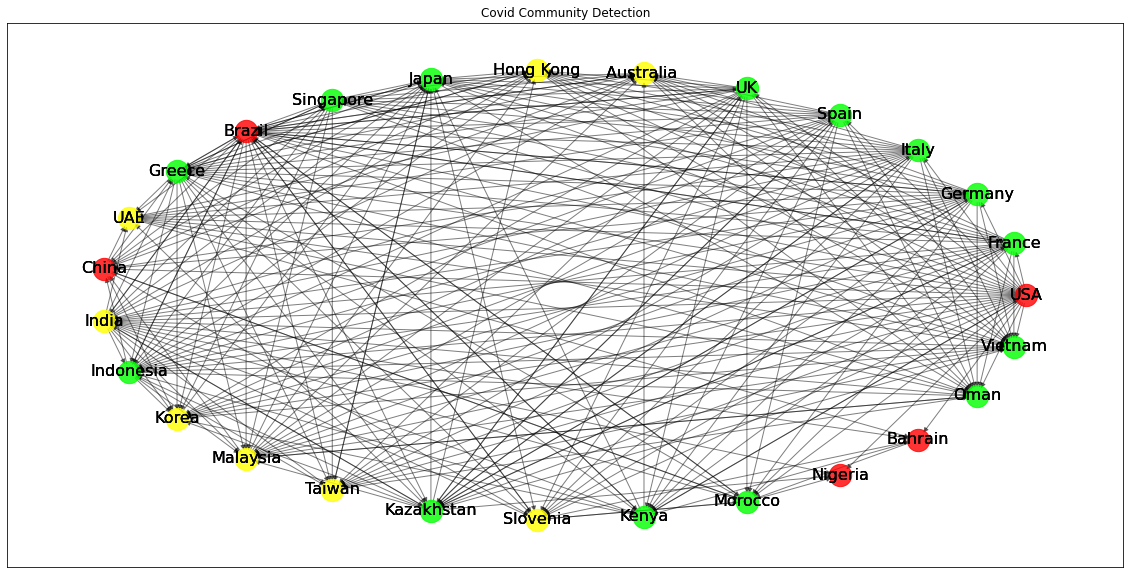

In [ ]:
lapmat= nx.directed_laplacian_matrix(financial)
clustering = SpectralClustering(n_clusters=3,assign_labels='discretize', random_state = 1).fit_predict(lapmat)

cluster_dict = {}
for idx, i in enumerate(clustering):
  cluster_dict[idx] = i
pos = nx.circular_layout(financial)
name = "Financial Community Detection (overall)"
drawCommunities(financial, cluster_dict, pos, name, fin_stock_dict)

/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_spectral.py:482: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"


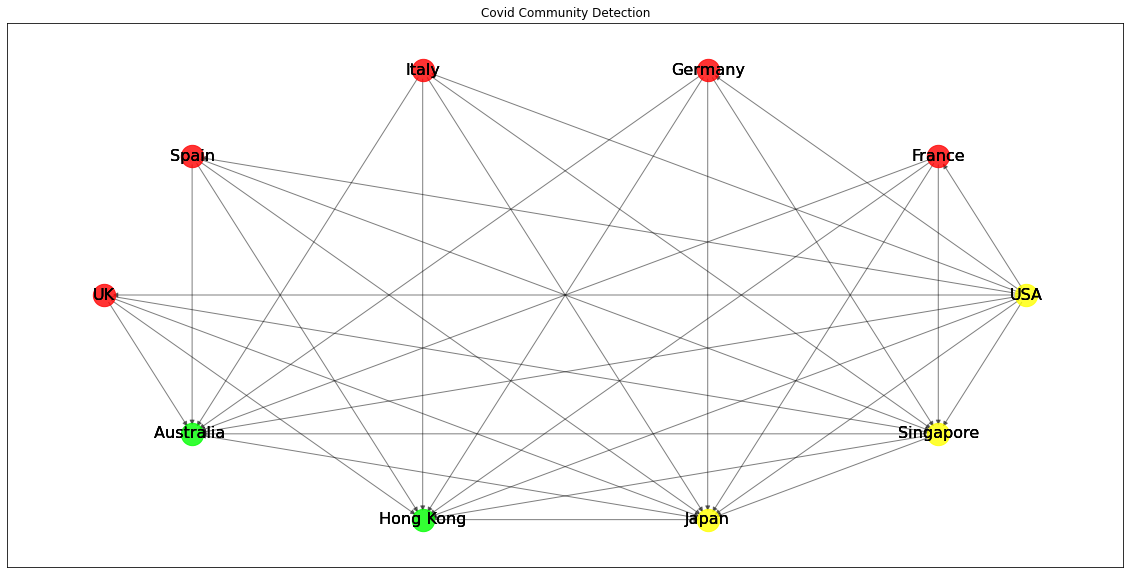

In [ ]:
lapmat= nx.directed_laplacian_matrix(Devfinancial)
clustering = SpectralClustering(n_clusters=3,assign_labels='discretize', random_state = 1).fit_predict(lapmat)

cluster_dict = {}
for idx, i in enumerate(clustering):
  cluster_dict[idx] = i
pos = nx.circular_layout(Devfinancial)
name = "Financial Community Detection (Developed)"
drawCommunities(Devfinancial, cluster_dict, pos, name, findev_stock_dict)

/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_spectral.py:482: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"


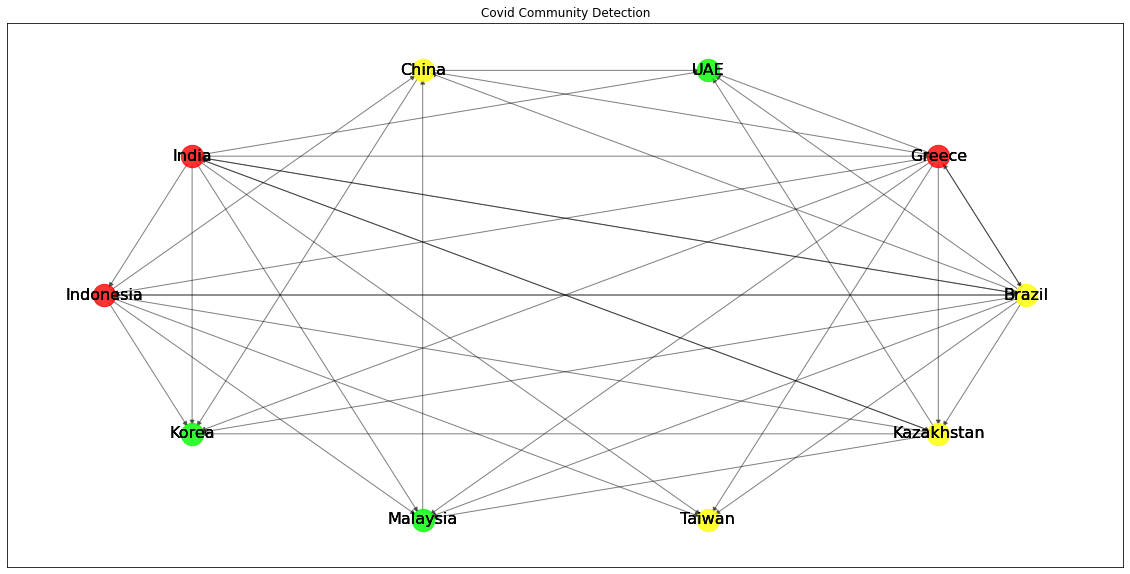

In [ ]:
lapmat= nx.directed_laplacian_matrix(Emfinancial)
clustering = SpectralClustering(n_clusters=3,assign_labels='discretize', random_state = 1).fit_predict(lapmat)

cluster_dict = {}
for idx, i in enumerate(clustering):
  cluster_dict[idx] = i
pos = nx.circular_layout(Emfinancial)
name = "Financial Community Detection (Emerging)"
drawCommunities(Emfinancial, cluster_dict, pos, name, finem_stock_dict)

/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_spectral.py:482: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"


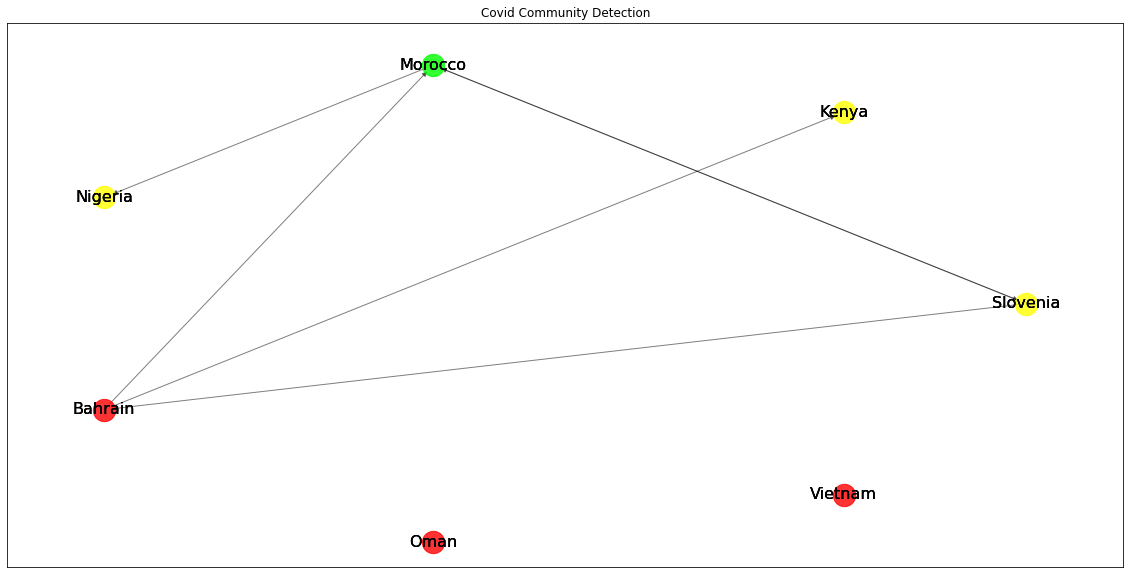

In [ ]:
lapmat= nx.directed_laplacian_matrix(Frontfinancial)
clustering = SpectralClustering(n_clusters=3,assign_labels='discretize', random_state = 1).fit_predict(lapmat)

cluster_dict = {}
for idx, i in enumerate(clustering):
  cluster_dict[idx] = i
pos = nx.circular_layout(Frontfinancial)
name = "Financial Community Detection (Frontier)"
drawCommunities(Frontfinancial, cluster_dict, pos, name, finfront_stock_dict)